<div class="container" style="display:flex; width:100%;height:150px;background-color:None;">
    <div class="subcontainer-1" style="flex:0.11;height:100%;width:20%;">
        <div class="logo-frame" style="height:100%;background-color:None;">
            <img src="https://raw.githubusercontent.com/andikaaa18/Tripleten_datascience_project/main/Assets/logo_tripleten.png" style="height:100%;float:left; filter:invert(0%);">
        </div>
    </div>
    <div class="subcontainer-2" style="flex:0.89;height:60%;margin-top:2.5%">
        <div class="upper-sidebar" style="height:50%;width:100%;background-color:None;align-items:center;display:inline-flex;">
            <div style="font-size:50px; font-family:Trebuchet MS; font-weight:bold; text-align:left">
            Tripleten Indonesia Project
            </div>
        </div>
        <div class="lower-sidebar" style="height:50%;width:100%;background-color:None;align-items:center;display: inline-flex;">
            <div style="font-size:30px; font-family:Trebuchet MS;">
            &mdash; Sprint 12 : Metode Numerik
            </div>
        </div>
    </div>
</div>

<hr style="width:95%;height:2px;background-color:black;" align="left">

<div style="font-family:Trebuchet MS; font-weight:bold; font-size:45px; text-align:left; line-height:50px">
Memprediksi Nilai Pasar Mobil Bekas Secara Instan Menggunakan Model ML (<i>Machine-learning</i>) Berbasis Gradient Boosting
</div>
&mdash; Disertai perbandingan antara metode <i>bagging</i> dan <i>boosting</i> dengan model <b><i>Linear Regression</i></b> sebagai <i>baseline model</i>.

**Table of contents**<a id='toc0_'></a>    
- [**A. Pendahuluan**](#toc1_)    
  - [1) Deskripsi Proyek](#toc1_1_)    
  - [2) Tujuan dan Alur Proses](#toc1_2_)    
- [**B. Memuat Data**](#toc2_)    
- [**C. Ikhtisar Data**](#toc3_)    
- [**D. Mempersiapkan Data**](#toc4_)    
  - [1) Eksplorasi Data](#toc4_1_)    
    - [**Memeriksa Duplikasi**](#toc4_1_1_)    
    - [**Memeriksa Missing Value**](#toc4_1_2_)    
  - [2) Memperbaiki Data](#toc4_2_)    
    - [**Menangani Data Duplikat**](#toc4_2_1_)    
    - [**Menangani *Missing Value***](#toc4_2_2_)    
    - [**Memperbaiki Tipe Data**](#toc4_2_3_)    
  - [3) Pengayaan dan Reduksi Data](#toc4_3_)    
    - [**Pengayaan Data**](#toc4_3_1_)    
    - [**Reduksi Data**](#toc4_3_2_)    
  - [4) Perbandingan Data Sebelum dan Sesudah Ditangani](#toc4_4_)    
  - [5) Kesimpulan](#toc4_5_)    
- [**E. Analisa Data Eksploratif (EDA)**](#toc5_)    
  - [1) Statistika Deskriptif Pada Data Numerik](#toc5_1_)    
  - [2) Variasi Harga Mobil Pada Masing-masing Merek](#toc5_2_)    
  - [3) Pengaruh Tipe Kendaraan Terhadap Harga Mobil](#toc5_3_)    
  - [4) Bagaimana Jenis Bahan Bakar Mempengaruhi Harga Mobil?](#toc5_4_)    
  - [5) Harga Mobil Untuk Jenis Transmisi yang Berbeda](#toc5_5_)    
  - [6) Korelasi Antar Variabel Numerik](#toc5_6_)    
  - [7) Penanganan *Outliers*](#toc5_7_)    
  - [8) Kesimpulan](#toc5_8_)    
- [**F. Membangun Model *Machine-learning***](#toc6_)    
  - [1) *Features Engineering*](#toc6_1_)    
    - [**Membagi Dataset**](#toc6_1_1_)    
    - [**Perbaikan Data**](#toc6_1_2_)    
      - [a. Training Set](#toc6_1_2_1_)    
      - [b. Testing Set](#toc6_1_2_2_)    
      - [c. Memisahkan Data *Target* dan *Features*](#toc6_1_2_3_)    
    - [**Features Scaling**](#toc6_1_3_)    
    - [**One Hot Encoding**](#toc6_1_4_)    
  - [2) *Model Optimization*](#toc6_2_)    
    - [**Random Forest Regressor**](#toc6_2_1_)    
    - [**Light GBM Regressor**](#toc6_2_2_)    
    - [**XGBoost Regressor**](#toc6_2_3_)    
    - [**Kesimpulan**](#toc6_2_4_)    
  - [3) *Model Testing*](#toc6_3_)    
    - [**Baseline Model**](#toc6_3_1_)    
    - [**Real Model**](#toc6_3_2_)    
      - [XGBoost Regressor](#toc6_3_2_1_)    
      - [Light GBM Regressor](#toc6_3_2_2_)    
- [**G. Kesimpulan**](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[**A. Pendahuluan**](#toc0_)

## <a id='toc1_1_'></a>[1) Deskripsi Proyek](#toc0_)

<div style="font-family:Trebuchet MS; font-weight:bold; font-size:25px; padding-bottom:20px">Penambahan fitur prediksi harga pasar kendaraan bekas pada aplikasi jual-beli mobil bekas untuk menarik pembeli baru</div>

<div style="margin-left:2%; width:95%; text-align:justify">

Perusahaan **Rusty Bargain** merupakan perusahaan yang bergerak di bidang jual-beli mobil bekas. Saat ini, perusahaan tersebut sedang mengambangkan aplikasi agar dapat menarik pembeli baru. Salah satu fitur yang ingin dimuat pada aplikasi tersebut adalah fitur yang dapat memberi tahu harga pasar mobil bekas secara akurat dan cepat. Oleh karena itu, perusahaan tersebut meminta kita untuk membuat fitur tersebut menggunakan *machine-learning*. Perusahaan juga memberikan data-data yang dibutuhkan untuk mengembangkan model seperti spesifikasi teknis kendaraan, versi model kendaraan, dan historis harga jual kendaraan.
</div>

## <a id='toc1_2_'></a>[2) Tujuan dan Alur Proses](#toc0_)

<div style="font-family:Trebuchet MS; font-size:25px; padding-bottom:20px; font-weight:bold">TUJUAN</div>
<div style="margin-left:2%; width:95%; text-align:justify">

Tujuan yang ingin dicapai pada proyek ini adalah dapat menghasilkan model yang mampu memprediksi harga pasar mobil bekas secara instan dan akurat. Fokus proyek akan ditujukan pada 3 aspek, yaitu:
1. Keakuratan prediksi model.
2. Kecepatan prediksi model.
3. Waktu yang dibutuhkan untuk melatih model.
</div>

<div style="font-family:Trebuchet MS; font-size:25px; padding-bottom:20px; font-weight:bold">ALUR PROYEK</div>
<div style="margin-left:2%; width:95%;text-align:justify">

Adapun proses yang akan dilakukan dalam proses analis untuk proyek ini terdiri dari beberapa langkah utama, yaitu:
1. **Ikhtisar Data.** <div> Pada bagian ini, data yang telah diimpor akan dipahami setiap parameter data serta sejumlah catatan dokumentasi terkait dataset.</div>        
2. **Mempersiapkan Data.** <div> Pada bagian ini, data yang telah diimpor akan dilakukan proses eksplorasi untuk melihat berbagai permasalahan pada data kemudian dilanjutkan dengan perbaikan data. Apabila diperlukan, reduksi dan pengayaan data akan dilakukan untuk membuang informasi yang tidak relevan dan memperkaya informasi pada dataset. Hasil akhir dari proses ini yaitu dataset yang siap untuk dilakukan proses analisis.</div>        
2. **Analisa Data Eksploratif.** <div> Pada bagian ini, data yang telah dipersiapkan akan dilakukan sejumlah perhitungan statistik deskriptif dan menampilkan sejumlah visualisasi data untuk melihat pola-pola tertentu.</div>
3. **Membangun Model *Machine-learning*.** <div> Pada bagian ini akan dilakukan sejumlah proses, diantaranya: *feature engineering*, *hyperparameter tuning* dan diakhiri dengan *model testing*.
</div>

</div>

# <a id='toc2_'></a>[**B. Memuat Data**](#toc0_)

* Memuat sejumlah *library* dan data yang dibutuhkan.

In [1]:
# import library untuk mengolah data
import pandas as pd, numpy as np, scipy.stats as st

# import library untuk data viz
import matplotlib.pyplot as plt, seaborn as sns
import matplotlib.patheffects as pe

# import library untuk machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# import library untuk model evaluation dan feature engineering
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import KFold, train_test_split
import optuna

# import library untuk manage warning report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# import library untuk utility
from tqdm import tqdm
import timeit, time

d:\~BelajarProg\Python\Bootcamp_Practicum\12_Metode_Numerik\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# memuat dataset
try:
    raw_df = pd.read_csv("datasets/car_data.csv")
    
except:
    raw_df = pd.read_csv("/datasets/car_data.csv")

# <a id='toc3_'></a>[**C. Ikhtisar Data**](#toc0_)

Berikut di bawah ini ditampilkan 10 baris data pada dataset yang akan dianalisis.

In [3]:
# menampilkan dataset
print(f"Ukuran dataset : {raw_df.shape}")
raw_df.sample(10, random_state=101010)

Ukuran dataset : (354369, 16)


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
242386,14/03/2016 15:44,550,wagon,1997,auto,114,laguna,125000,9,petrol,renault,no,14/03/2016 00:00,0,26441,05/04/2016 18:45
77507,02/04/2016 18:44,6900,small,1973,NaN,0,kaefer,40000,6,NaN,volkswagen,no,02/04/2016 00:00,0,32549,06/04/2016 18:17
234209,26/03/2016 19:36,2345,convertible,1986,manual,102,3er,150000,6,petrol,bmw,no,26/03/2016 00:00,0,92245,28/03/2016 09:45
156855,27/03/2016 22:49,3000,bus,2001,auto,0,vito,150000,8,gasoline,mercedes_benz,no,27/03/2016 00:00,0,12059,05/04/2016 22:17
17201,14/03/2016 00:51,2999,small,2003,auto,41,other,60000,9,gasoline,smart,no,13/03/2016 00:00,0,12555,14/03/2016 08:44
329568,29/03/2016 22:50,3900,sedan,1999,manual,241,other,150000,10,petrol,mercedes_benz,no,29/03/2016 00:00,0,32052,06/04/2016 12:15
341249,25/03/2016 10:56,300,convertible,1991,manual,0,golf,70000,0,petrol,volkswagen,yes,25/03/2016 00:00,0,26639,28/03/2016 10:17
237852,21/03/2016 09:37,100,sedan,1991,manual,90,passat,150000,7,petrol,volkswagen,yes,21/03/2016 00:00,0,10963,21/03/2016 10:45
143753,05/04/2016 11:55,6900,sedan,1979,NaN,0,7er,150000,5,petrol,bmw,NaN,05/04/2016 00:00,0,73326,05/04/2016 12:40
282476,20/03/2016 09:48,16999,suv,2015,manual,135,sportage,40000,5,petrol,kia,no,20/03/2016 00:00,0,47495,20/03/2016 09:48


Berikut di bawah ini merupakan deskripsi dari masing-masing kolom berdasarkan dokumentasi pada dataset.

***Features***
* `DateCrawled`  — Tanggal ketika profil kendaraan di-*crawl* dari situs web sumber.
* `VehicleType` — Jenis bodi kendaraan.
* `RegistrationYear` — Tahun registrasi kendaraan.
* `Gearbox` — Jenis transmisi.
* `Power` — Daya kendaraan (hp).
* `Model` — Model kendaraan.
* `Mileage` — Jarak tempuh mobil (Km).
* `RegistrationMonth` — Bulan registrasi kendaraan.
* `FuelType` — Jenis bahan bakar.
* `Brand` — Merek kendaraan.
* `NotRepaired` — Status apakah kerusakan pada kendaraan belum direparasi (`yes`: Belum direparasi; `no`: Sudah direparasi).
* `DateCreated` — Tanggal profil kendaraan diunggah ke situs web.
* `NumberOfPictures` — Jumlah gambar kendaraan yang diunggah ke situs web.
* `PostalCode` — Kode pos pengguna yang mengunggah profil kendaraan.
* `LastSeen` — Tanggal aktivitas terakhir pengunggah profil kendaraan.

***Target***
* `Price` — Harga jual mobil bekas yang dipasang oleh pengunggah profil kendaraan pada situs web (Euro).

Pada dataset ini, **terdapat 16 kolom (15 fitur + 1 target) disertai 354369 observasi profil kendaraan**. Dataset ini memiliki data yang sangat banyak dan tergolong **dataset yang besar**. Kolom `'Price'` akan menjadi variabel dependen (*target*) pada proyek ini sedangkan kolom lainnya akan menjadi variabel independen (*features*).

# <a id='toc4_'></a>[**D. Mempersiapkan Data**](#toc0_)

## <a id='toc4_1_'></a>[1) Eksplorasi Data](#toc0_)

Berikut di bawah ini merupakan informasi umum dataset.

In [4]:
# menampilkan informasi umum dataset
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Dari informasi di atas, diperoleh:
* Terdapat kolom dengan tipe data yang salah, yaitu `'DateCrawled'`, `'DateCreated'` dan `'LastSeen'` yang seharusnya memiliki tipe data *datetime*.
* Ditemukannya *missing value* pada sejumlah kolom , yaitu `'VehicleType'`, `'Gearbox'`, `'Model'`, `'FuelType'`, dan `'NotRepaired'`


In [5]:
# menampilkan 15 observasi acak
raw_df.sample(15, random_state=101010)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
242386,14/03/2016 15:44,550,wagon,1997,auto,114,laguna,125000,9,petrol,renault,no,14/03/2016 00:00,0,26441,05/04/2016 18:45
77507,02/04/2016 18:44,6900,small,1973,NaN,0,kaefer,40000,6,NaN,volkswagen,no,02/04/2016 00:00,0,32549,06/04/2016 18:17
234209,26/03/2016 19:36,2345,convertible,1986,manual,102,3er,150000,6,petrol,bmw,no,26/03/2016 00:00,0,92245,28/03/2016 09:45
156855,27/03/2016 22:49,3000,bus,2001,auto,0,vito,150000,8,gasoline,mercedes_benz,no,27/03/2016 00:00,0,12059,05/04/2016 22:17
17201,14/03/2016 00:51,2999,small,2003,auto,41,other,60000,9,gasoline,smart,no,13/03/2016 00:00,0,12555,14/03/2016 08:44
329568,29/03/2016 22:50,3900,sedan,1999,manual,241,other,150000,10,petrol,mercedes_benz,no,29/03/2016 00:00,0,32052,06/04/2016 12:15
341249,25/03/2016 10:56,300,convertible,1991,manual,0,golf,70000,0,petrol,volkswagen,yes,25/03/2016 00:00,0,26639,28/03/2016 10:17
237852,21/03/2016 09:37,100,sedan,1991,manual,90,passat,150000,7,petrol,volkswagen,yes,21/03/2016 00:00,0,10963,21/03/2016 10:45
143753,05/04/2016 11:55,6900,sedan,1979,NaN,0,7er,150000,5,petrol,bmw,NaN,05/04/2016 00:00,0,73326,05/04/2016 12:40
282476,20/03/2016 09:48,16999,suv,2015,manual,135,sportage,40000,5,petrol,kia,no,20/03/2016 00:00,0,47495,20/03/2016 09:48


In [6]:
# persentase data dimana tanggal 'LastSeen' terjadi setelah tanggal 'DateCrawled'
print("Persentase tanggal 'LastSeen' terjadi setelah tanggal 'DataCrawled' : {:.2%}".format(
    (pd.to_datetime(raw_df['DateCrawled'], format="%d/%m/%Y %H:%M") < 
     pd.to_datetime(raw_df['LastSeen'], format="%d/%m/%Y %H:%M")).sum()/raw_df.shape[0]))

Persentase tanggal 'LastSeen' terjadi setelah tanggal 'DataCrawled' : 89.72%


In [7]:
# persentase data dengan 'NumberOfPictures' bernilai 0
print("Persentase data 'NumberOfPictures' bernilai 0 : {:.2%}".format(
    (raw_df['NumberOfPictures']==0).sum()/raw_df.shape[0]))

Persentase data 'NumberOfPictures' bernilai 0 : 100.00%


In [8]:
# persentase data dengan 'Power' bernilai 0
print("Persentase data 'Power' bernilai 0 : {:.2%}".format(
    (raw_df['Power']==0).sum()/raw_df.shape[0]))

Persentase data 'Power' bernilai 0 : 11.35%


In [9]:
# persentase data dengan 'RegistrationMonth' bernilai 0
print("Persentase data 'RegistrationMonth' bernilai 0 : {:.2%}".format(
    (raw_df['RegistrationMonth']==0).sum()/raw_df.shape[0]))

Persentase data 'RegistrationMonth' bernilai 0 : 10.54%


Dari informasi di atas, diperoleh:
* Ada keanehan nilai pada kolom `'DateCrawled'` dan `'LastSeen'` karena data tanggal `'LastSeen'` terjadi setelah data tanggal `'DateCrawled'` dimana seharusnya adalah sebaliknya. Keanehan ini terdapat sebanyak 89.72% observasi di dataset.
* Data pada kolom `'NumberOfPictures'` memiliki nilai 0 seluruhnya, **hal ini sangat tidak wajar**, kemungkinan itu merupakan bagian dari *missing value*.
* Ditemukan sebesar 11.35% data dimana kendaraan memiliki `'Power'` bernilai 0 hp, **hal ini sangat tidak wajar**, kemungkinan itu merupakan bagian dari *missing value*.
* Ditemukan sebesar 10.54% data `'RegistrationMonth'` bernilai 0, **hal ini sangat tidak wajar**, kemungkinan itu merupakan bagian dari *missing value*.

### <a id='toc4_1_1_'></a>[**Memeriksa Duplikasi**](#toc0_)

Setiap observasi bersifat unik karena mewakili satu profil mobil bekas yang akan dijual. Oleh karena itu, **apabila terdapat suatu observasi yang identik dengan observasi lainnya maka akan dianggap sebagai duplikat dan harus dikeluarkan dari dataset**. Berikut akan dilakukan kalkulasi jumlah observasi yang merupakan duplikat pada dataset.

In [10]:
# menghitung observasi duplikat
print("Terdapat sebanyak {}({:.2%}) observasi duplikat pada dataset".format(
    raw_df.duplicated().sum(), (raw_df.duplicated().sum()/raw_df.shape[0])
))

Terdapat sebanyak 262(0.07%) observasi duplikat pada dataset


### <a id='toc4_1_2_'></a>[**Memeriksa Missing Value**](#toc0_)

Berikut di bawah ini, akan ditampilkan persentase data yang hilang pada masing-masing kolom.

In [11]:
# menampilkan persentase data yang hilang pada setiap kolom
((raw_df.isna().sum(axis=0).sort_values(ascending=False)/raw_df.shape[0])*100)

NotRepaired          20.079070
VehicleType          10.579368
FuelType              9.282697
Gearbox               5.596709
Model                 5.560588
DateCrawled           0.000000
Price                 0.000000
RegistrationYear      0.000000
Power                 0.000000
Mileage               0.000000
RegistrationMonth     0.000000
Brand                 0.000000
DateCreated           0.000000
NumberOfPictures      0.000000
PostalCode            0.000000
LastSeen              0.000000
dtype: float64

Berikut di bawah ini, akan ditampilkan persentase observasi yang memiliki *missing value*.

In [12]:
# menampilkan persentase observasi dengan missing value
print("Persentase obsevasi dengan missng value : {:.2%}".format(
    raw_df.isna().any(axis=1).sum()/raw_df.shape[0]
))

Persentase obsevasi dengan missng value : 30.63%


Dari informasi di atas, diperoleh:
* *Missing value* ditemukan pada kolom `'NotRepaired'`, `'VehicleType'`, `'FuelType'`, `'Gearbox'`, dan `'Model'`.
* Mayoritas *missing value* pada observasi disebabkan oleh data pada kolom `'NotRepaired'`, `'VehicleType'` dan `'FuelType'` yaitu sebesar 20.1%, 10.6% dan 9.3% secara berturut-turut.
* Menghapus observasi yang memiliki *missing value* akan menghilangkan cukup banyak data, yaitu sebesar 30.6% data.

Pada surat kendaraan, umumnya tersedia informasi mengenai data `'Brand'`, `'Model'`, `'VehicleType'`, `'RegistrasionYear'`, `'RegistaritionMonth'`, `'FuelType'`, `'Gearbox'` dan `'Power'`. Oleh karena itu, *missing value* pada sejumlah data tersebut tidak disebabkan **ketidaktahuan pemilik kendaraan** sehingga mereka tidak menginput data-data tersebut ketika membuat profil mobil bekas.

Berikut adalah beberapa kemungkinan penyebab terdapatnya *missing value* pada data:
1. Situs tidak mewajibkan pengisian data `'NotRepaired'`, `'VehicleType'`, `'FuelType'`, `'Gearbox'`, dan `'Model'` sehingga terdapat beberapa pengguna yang tidak mengisi data tersebut.
2. Terdapat kesalahan selama proses *data crawling* sehingga terdapat sejumlah data yang tidak dapat ditarik.

## <a id='toc4_2_'></a>[2) Memperbaiki Data](#toc0_)

### <a id='toc4_2_1_'></a>[**Menangani Data Duplikat**](#toc0_)

Berdasarkan eksplorasi yang telah dilakukan, terdapat sebanyak 262(0.07%) observasi duplikat pada dataset. Oleh karena itu, data-data duplikat tersebut akan dikeluarkan dari dataset.

In [13]:
# fungsi untuk menangani data duplikat
def duplicate_handling(df):
    return df.drop_duplicates()

In [14]:
# menangani duplikat
eda_df = duplicate_handling(raw_df).reset_index(drop=True)

# cek
print(f"jumlah duplikat pada dataset EDA : {eda_df.duplicated().sum()}")

jumlah duplikat pada dataset EDA : 0


### <a id='toc4_2_2_'></a>[**Menangani *Missing Value***](#toc0_)

Berdasarkan eksplorasi yang telah dilakukan, ditemukan *missing value* pada kolom `'NotRepaired'`, `'VehicleType'`, `'FuelType'`, `'Gearbox'`, dan `'Model'`. Beberapa kemungkinan alasan terdapatnya *missing value*, yaitu:
1. Situs tidak mewajibkan pengisian data `'NotRepaired'`, `'VehicleType'`, `'FuelType'`, `'Gearbox'`, dan `'Model'` sehingga terdapat beberapa pengguna yang tidak mengisi data tersebut.
2. Terdapat kesalahan selama proses *data crawling* sehingga terdapat sejumlah data yang tidak dapat ditarik.



Berdasarkan observasi yang telah dilakukan pada eksplorasi data, ditemukan pula kolom lainnya yang terindikasi sebagai *missing value* karena memiliki nilai yang tidak normal, yaitu:
* **`'NumberOfPictures'`** : Data pada kolom `'NumberOfPictures'`  memiliki nilai 0 seluruhnya, **hal ini sangat tidak wajar**, kemungkinan itu merupakan bagian dari *missing value*.
* **`'Power'`** : Ditemukan sebesar 11.35% data dimana kendaraan memiliki `'Power'` bernilai 0 hp, **hal ini sangat tidak wajar**, kemungkinan itu merupakan bagian dari *missing value*.
* **`'RegistrationMonth'`** : Ditemukan sebesar 10.54% data `'RegistrationMonth'` bernilai 0, **hal ini sangat tidak wajar**, kemungkinan itu merupakan bagian dari *missing value*.

Apabila mengeluarkan seluruh observasi yang memiliki *missing value*, maka kita akan kehilangan data sebanyak 30.63%. Oleh karena itu, kita akan meminimalisir data yang terbuang dengan melakukan pengisian nilai yang hilang dengan metode berikut.
1. Mengeluarkan seluruh observasi dengan nilai **NaN** pada kolom `'VehicleType'`.
2. Dengan pengelompokan/pengindeksan **(`'Brand'`, `'VehicleType'`)**, ambil nilai *top frequency* dari data `'FuelType'`, `'Gearbox'`, dan `'Model'`. Gunakan data-data tersebut untuk pengisian *missing value* sesuai pengelompokan/pengindeksan. Apabila terdapat data yang hilang dengan indeks **(`'Brand'`, `'VehicleType'`)** tidak tersedia pada data *top frequency*, maka akan dibiarkan bernilai **NaN**.
3. Setelah itu, data tersisa yang masih memiliki *missing value* akan dibuang seluruhnya.
4. Observasi bernilai 0 pada kolom `'Power'` dan `'RegistrationMonth'` dan kolom `'NumberOfPictures'` yang merupakan bagian dari *missing value* juga akan dibuang dari dataset.



In [15]:
def cat_mode(a:pd.Series):
    if len(a.mode())>1:
        np.random.seed(101010)
        mode_index = np.random.randint(low = 0, high = len(a.mode()))
        return a.mode()[mode_index]
    else:
        return a.mode()[0]
    
def missing_value_handling(df:pd.DataFrame):
    data = df.copy()
    data = data.dropna(subset='VehicleType')
    
    FuelType_data = data[~data['FuelType'].isna()].groupby(['Brand', 'VehicleType']).agg({'FuelType':lambda x:cat_mode(x)})
    Gearbox_data = data[~data['Gearbox'].isna()].groupby(['Brand', 'VehicleType']).agg({'Gearbox':lambda x:cat_mode(x)})
    Model_data = data[~data['Model'].isna()].groupby(['Brand', 'VehicleType']).agg({'Model':lambda x:cat_mode(x)})
    
    def fill_na(df, reference, column_to_fill:str):
        if pd.isna(df[column_to_fill]):
            if (df['Brand'], df['VehicleType']) in reference.index:
                df[column_to_fill] = reference.loc[(df['Brand'], df['VehicleType']), column_to_fill]
            else:
                df[column_to_fill] = df[column_to_fill]
        else:
            df[column_to_fill] = df[column_to_fill]
        
        return df[column_to_fill]
       
    data['FuelType'] = data.apply(fill_na, axis=1, args=(FuelType_data, 'FuelType'))    
    data['Gearbox'] = data.apply(fill_na, axis=1, args=(Gearbox_data, 'Gearbox'))    
    data['Model'] = data.apply(fill_na, axis=1, args=(Model_data, 'Model'))    
    
    # membuang seluruh missing value tersisa
    data = data.dropna()
    data = data[(data['Power']>0)&(data['RegistrationMonth']>0)]
    data = data.drop("NumberOfPictures", axis=1)
    
    return data

In [16]:
# menangani missing value - untuk EDA dataset
eda_df = missing_value_handling(eda_df).reset_index(drop=True)

# check
print(f"Jumlah cell dengan missing value : {eda_df.isna().sum().sum()}")

Jumlah cell dengan missing value : 0


### <a id='toc4_2_3_'></a>[**Memperbaiki Tipe Data**](#toc0_)

Berdasarkan eksplorasi yang telah dilakukan, perbaikan tipe data perlu dilakukan pada kolom `'DateCrawled'`, `'DateCreated'` dan `'LastSeen'` agar memiliki tipe data *Datetime*. Berikut akan ditampilkan kembali informasi data terkini.

In [17]:
# informasi data
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241359 entries, 0 to 241358
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        241359 non-null  object
 1   Price              241359 non-null  int64 
 2   VehicleType        241359 non-null  object
 3   RegistrationYear   241359 non-null  int64 
 4   Gearbox            241359 non-null  object
 5   Power              241359 non-null  int64 
 6   Model              241359 non-null  object
 7   Mileage            241359 non-null  int64 
 8   RegistrationMonth  241359 non-null  int64 
 9   FuelType           241359 non-null  object
 10  Brand              241359 non-null  object
 11  NotRepaired        241359 non-null  object
 12  DateCreated        241359 non-null  object
 13  PostalCode         241359 non-null  int64 
 14  LastSeen           241359 non-null  object
dtypes: int64(6), object(9)
memory usage: 27.6+ MB


Dari informasi di atas terlihat bahwa kolom `'DateCrawled'`, `'DateCreated'` dan `'LastSeen'` perlu dilakukan perbaikan tipe data menjadi tipe data *datetime*. Selain itu, tipe data yang digunakan kolom `'NotRepaired'` tidak salah tetapi kita akan menggantinya menjadi tipe data integer yang bernilai 0 (**'no'**) dan 1 (**'yes'**).

In [18]:
def datatype_handling(dataframe):
    df = dataframe.copy()
    df['DateCrawled'] = pd.to_datetime(df['DateCrawled'], format="%d/%m/%Y %H:%M")
    df['DateCreated'] = pd.to_datetime(df['DateCreated'], format="%d/%m/%Y %H:%M")
    df['LastSeen'] = pd.to_datetime(df['LastSeen'], format="%d/%m/%Y %H:%M")
    df['NotRepaired'] = df['NotRepaired'].replace({'yes':1, 'no':0})
    
    return df

In [19]:
# memperbaiki tipe data
eda_df = datatype_handling(eda_df).reset_index(drop=True)

# check
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241359 entries, 0 to 241358
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        241359 non-null  datetime64[ns]
 1   Price              241359 non-null  int64         
 2   VehicleType        241359 non-null  object        
 3   RegistrationYear   241359 non-null  int64         
 4   Gearbox            241359 non-null  object        
 5   Power              241359 non-null  int64         
 6   Model              241359 non-null  object        
 7   Mileage            241359 non-null  int64         
 8   RegistrationMonth  241359 non-null  int64         
 9   FuelType           241359 non-null  object        
 10  Brand              241359 non-null  object        
 11  NotRepaired        241359 non-null  int64         
 12  DateCreated        241359 non-null  datetime64[ns]
 13  PostalCode         241359 non-null  int64   

## <a id='toc4_3_'></a>[3) Pengayaan dan Reduksi Data](#toc0_)

### <a id='toc4_3_1_'></a>[**Pengayaan Data**](#toc0_)

Data waktu pada dataset merupakan data absolut sehingga kita perlu melakukan perhitungan turunan untuk sejumlah data waktu. Variabel usia kendaraan merupakan variabel turunan yang akan kita hitung. Perhitungan usia kendaraan akan dilakukan dengan menghitung selisih tahun `'DateCreated'` terhadap tahun pada `'RegistrationYear'`. 

Adapun untuk analisa *seasoanality*, maka akan diambil data hari dalam setahun (1-365) yang bersumber dari kolom `'DateCreated'`.

In [20]:
def data_enrichment(df):
    data = df.copy()
    data['Age'] = data['DateCreated'].dt.year - data['RegistrationYear']
    data['DaysCreated'] = data['DateCreated'].dt.day_of_year
    return data

In [21]:
# Melakukan pengayaan data
eda_df = data_enrichment(eda_df)

### <a id='toc4_3_2_'></a>[**Reduksi Data**](#toc0_)

Pada bagian ini, kita akan membuang data yang tidak diperlukan pada proyek ini. Data-data yang perlu dibuang adalah data-data yang memiliki keterkaitan dengan data lainnya dan data-data yang bersifat abnormal. Berikut adalah fitur-fitur yang akan dibuang dari dataset:
1. **Fitur yang memiliki hubungan dengan fitur lainnya.**
    * `'DateCreated'` dan `'RegistrationYear'` yang memiliki hubungan dengan `'Age'` dan `'DaysCreated'`.
2. **Fitur yang bersifat abnormal.**
    * `'LastSeen'` dan `'DateCrawled'` yang memiliki keabnormalan karena data tanggal `'LastSeen'` terjadi setelah data tanggal `'DateCrawled'` dimana seharusnya adalah sebaliknya. Keanehan ini terdapat sebanyak 89.72% observasi di dataset.


In [22]:
def data_reduction(df):
    data = df.copy()
    data = data.drop(['DateCreated', 'RegistrationYear', 'LastSeen', 'DateCrawled'], axis=1)
    return data

In [23]:
# Melakukan reduksi data
eda_df = data_reduction(eda_df)

In [24]:
# menampilkan dataset
eda_df.sample(10, random_state=101010)

,Price,VehicleType,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,PostalCode,Age,DaysCreated
70225,5723,sedan,manual,143,3er,125000,2,petrol,bmw,0,9599,11,92
193927,18599,bus,manual,140,galaxy,60000,10,gasoline,ford,0,48529,3,84
39647,6000,coupe,auto,170,other,5000,7,petrol,ford,0,4895,38,69
28407,1799,convertible,auto,110,megane,150000,6,petrol,renault,0,72393,14,95
58034,3300,small,manual,60,c3,70000,11,petrol,citroen,0,89073,12,87
37282,350,sedan,manual,75,golf,150000,10,petrol,volkswagen,0,24211,21,72
6474,12500,small,manual,63,other,125000,6,petrol,mini,0,47506,19,79
100105,1999,bus,manual,116,zafira,150000,6,petrol,opel,0,45128,16,90
81420,6299,suv,auto,241,grand,150000,5,petrol,jeep,0,39524,18,88
42993,12000,small,manual,60,polo,30000,5,petrol,volkswagen,0,47167,2,83


## <a id='toc4_4_'></a>[4) Perbandingan Data Sebelum dan Sesudah Ditangani](#toc0_)

In [25]:
# ukuran dataset
print(f"Ukuran dataset mentah                                      : {raw_df.shape}")
print(f"Ukuran dataset setelah ditangani                           : {eda_df.shape}")
print(f"Persentase observasi yang tereduksi setelah data ditangani : {(abs(eda_df.shape[0]-raw_df.shape[0])/raw_df.shape[0]):.2%}")

Ukuran dataset mentah                                      : (354369, 16)
Ukuran dataset setelah ditangani                           : (241359, 13)
Persentase observasi yang tereduksi setelah data ditangani : 31.89%


In [26]:
# komposisi data 'FuelType'
FuelType_comparison = raw_df['FuelType'].value_counts(True).reset_index().merge(
    eda_df['FuelType'].value_counts(True).reset_index(), on='FuelType', how='outer',
    suffixes=('_rawData', '_edaData')
)

FuelType_comparison.sort_values('proportion_rawData', ascending=False)

,FuelType,proportion_rawData,proportion_edaData
0,petrol,0.673000,0.660448
1,gasoline,0.307085,0.321115
2,lpg,0.016518,0.015483
3,cng,0.001758,0.001794
4,hybrid,0.000725,0.000708
5,other,0.000635,0.000228
6,electric,0.000280,0.000224


In [27]:
# komposisi data 'Gearbox'
Gearbox_comparison = raw_df['Gearbox'].value_counts(True).reset_index().merge(
    eda_df['Gearbox'].value_counts(True).reset_index(), on='Gearbox', how='outer',
    suffixes=('_rawData', '_edaData')
)

Gearbox_comparison.sort_values('proportion_rawData', ascending=False)

,Gearbox,proportion_rawData,proportion_edaData
0,manual,0.80186,0.789981
1,auto,0.19814,0.210019


In [28]:
# komposisi data Model'
Model_comparison = raw_df['Model'].value_counts(True).reset_index().merge(
    eda_df['Model'].value_counts(True).reset_index(), on='Model', how='outer',
    suffixes=('_rawData', '_edaData')
)

Model_comparison.sort_values('proportion_rawData', ascending=False).head(10)

,Model,proportion_rawData,proportion_edaData
0,golf,0.087347,0.082400
1,other,0.072972,0.073795
2,3er,0.059047,0.061812
3,polo,0.039042,0.035855
4,corsa,0.037560,0.033071
5,astra,0.032298,0.031484
6,passat,0.030317,0.030399
7,a4,0.029582,0.031542
8,c_klasse,0.024837,0.026840
9,5er,0.023510,0.025195


Berikut informasi yang diperoleh dari data di atas :
1. Ukuran dataset yang tereduksi cukup besar, yaitu sebesar 32%. Akan tetapi, disebabkan ukuran dataset mentah yang besar, maka observasi yang tersisa masih cukup banyak.
2. Secara resultan, ukuran fitur mengalami reduksi menjadi 13 kolom dari semula sebanyak 16 kolom.
3. Proporsi data kategorikal setelah dilakukan penanganan *missing value* cukup berimbang dengan data mentah pada kolom `'FuelType'`, `'Gearbox'` dan `'Model'`, sehingga penanganan *missing value* tidak merusak komposisi data.

## <a id='toc4_5_'></a>[5) Kesimpulan](#toc0_)

Dataset telah siap digunakan untuk proses **Analisa Data Ekspploratif (EDA)**. Seluruh permasalahan data telah ditangani. Berikut adalah sejumlah hal yang terjadi selama persiapan data.
1. Menghapus seluruh baris yang identik dengan baris lainnya.
2. Melakukan penanganan *missing value* dengan menggunakan metode *top frequency* untuk setiap pengelompokan **(`'Brand'`, `'VehicleType'`)** untuk mengisi nilai yang hilang pada kolom `'FuelType'`, `'Gearbox'`, dan `'Model'`. Pada penanganan *missing value* terdapat 1 fitur yang dibuang karena terindikasi memiliki banyak *missing value*, yaitu `'NumberOfPictures'`.
3. Melakukan perbaikan tipe data pada data tanggal.
4. Melakukan pengayaan data dengan menambah fitur usia kendaraan (`'Age'`) dan fitur hari pembuatan postingan untuk analisa *seasonal* (`'DaysCreated'`).
5. Melakukan reduksi data dengan menghapus sejumlah fitur yang memiliki relasi dengan fitur lainnya dan fitur yang memiliki keabnormalan data. Fitur-fitur yang direduksi tersebut diantara lain `'DateCreated'`, `'RegistrationYear'`, `'LastSeen'`, dan `'DateCrawled'`
6. Observasi pada dataset mengalami reduksi sebesar 31.89% setelah data dipersiapkan.

Berikut di bawah ini merupakan *function* untuk *data preparation* yang dapat digunakan dalam mempersiapkan data untuk pembangunan model *machine learning*.

In [29]:
def data_prep(df):
    data = df.copy()
    
    data = duplicate_handling(data).reset_index(drop=True) # duplicate handling
    data = missing_value_handling(data).reset_index(drop=True) # missing value handling
    data = datatype_handling(data).reset_index(drop=True) # data type handling
    data = data_enrichment(data) # data enrichment
    data = data_reduction(data) # data reduction
    
    return data

Berikut di bawah ini merupakan data yang siap digunakan untuk tahap **Analisa Data Eksploratif (EDA)**.

In [30]:
# Dataset EDA
eda_df.info()
eda_df.sample(5, random_state=101010)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241359 entries, 0 to 241358
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              241359 non-null  int64 
 1   VehicleType        241359 non-null  object
 2   Gearbox            241359 non-null  object
 3   Power              241359 non-null  int64 
 4   Model              241359 non-null  object
 5   Mileage            241359 non-null  int64 
 6   RegistrationMonth  241359 non-null  int64 
 7   FuelType           241359 non-null  object
 8   Brand              241359 non-null  object
 9   NotRepaired        241359 non-null  int64 
 10  PostalCode         241359 non-null  int64 
 11  Age                241359 non-null  int64 
 12  DaysCreated        241359 non-null  int32 
dtypes: int32(1), int64(7), object(5)
memory usage: 23.0+ MB


,Price,VehicleType,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,PostalCode,Age,DaysCreated
70225,5723,sedan,manual,143,3er,125000,2,petrol,bmw,0,9599,11,92
193927,18599,bus,manual,140,galaxy,60000,10,gasoline,ford,0,48529,3,84
39647,6000,coupe,auto,170,other,5000,7,petrol,ford,0,4895,38,69
28407,1799,convertible,auto,110,megane,150000,6,petrol,renault,0,72393,14,95
58034,3300,small,manual,60,c3,70000,11,petrol,citroen,0,89073,12,87


Berikut di bawah ini merupakan deskripsi dari masing-masing kolom untuk dataset setelah *pre-processing*.

***Features***
* `VehicleType` — Jenis bodi kendaraan.
* `Gearbox` — Jenis transmisi.
* `Power` — Daya kendaraan (hp).
* `Model` — Model kendaraan.
* `Mileage` — Jarak tempuh mobil (Km).
* `RegistrationMonth` — Bulan registrasi kendaraan.
* `FuelType` — Jenis bahan bakar.
* `Brand` — Merek kendaraan.
* `NotRepaired` — Status apakah kerusakan pada kendaraan belum direparasi (`1`: Belum direparasi; `0`: Sudah direparasi).
* `PostalCode` — Kode pos pengguna yang mengunggah profil kendaraan.
* `Age` — Usia kendaraan hingga profil dibuat pada situs web.
* `DaysCreated` — Hari dalam setahun (1-365) dimana profil kendaraan diunggah ke situs web.

***Target***
* `Price` — Harga jual mobil bekas yang dipasang oleh pengunggah profil kendaraan pada situs web (Euro).

# <a id='toc5_'></a>[**E. Analisa Data Eksploratif (EDA)**](#toc0_)

Berikut di bawah ini merupakan *function* yang dibutuhkan untuk visualisasi data pada proyek ini.

In [31]:
def line_box_plot(df, x, y, figsize, order_by='mean', ascending_order=True, rot=0, line_label=None, 
                    ylabel=None, xlabel=None, title=None, ylim=None, xlim=None, y_scale:str=None):
    aggre = df.groupby(x)[y].agg(order_by).sort_values(ascending=ascending_order)
    fig, ax1 = plt.subplots(figsize=figsize)
    sns.boxplot(ax=ax1, data=df, x=x, y=y, order=aggre.index, palette='Wistia_r', linewidth=1)
    sns.lineplot(ax=ax1, data=aggre, color='#786700', linewidth=1.5, linestyle='dashed', marker='o',
                 alpha=0.8, label=line_label)
    
    plt.xticks(rotation=rot)
    plt.grid(alpha=0.5, linestyle='dashed', which='both')
    plt.ylabel(ylabel, size=12)
    plt.xlabel(xlabel, size=12)
    plt.title(title, size=15)
    plt.legend(loc='upper right')
    plt.ylim(ylim)
    plt.xlim(xlim)
    if y_scale:
        plt.yscale(y_scale)
    plt.show()
    

In [32]:
def agg_barplot(df, x, y, figsize, agg='mean', ascending_order=True, rot=0, ylabel=None, xlabel=None, title=None
                , ylim=None, xlim=None, annot=True):
    data_agg = df.groupby(x)[y].agg(agg).sort_values(ascending=ascending_order).reset_index()
    fig,ax1 = plt.subplots(figsize=figsize)
    sns.barplot(ax=ax1, data=data_agg, x=x, y=y, palette='Wistia_r')
    
    if annot:
        for i in ax1.containers:
            x_ = i[0].get_x()
            y_ = i[0].get_height()
            width_ = i[0].get_width()
            ax1.text(x_+width_/2, y_, int(y_), ha='center', va='bottom', c='#BB2525', weight='bold', size=12,
                path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=90)
            
    plt.xticks(rotation=rot)
    plt.ylabel(ylabel, size=12)
    plt.xlabel(xlabel, size=12)
    plt.title(title, size=15)
    plt.ylim(ylim)
    plt.xlim(xlim)
    plt.grid(which='both', alpha=0.5, linestyle='dashed')
    
    
    plt.show()

In [33]:
def box_hist_plot(df:pd.DataFrame, column:str, size:tuple, width:int, title:str, y_title, xlabel:str, 
                  rot:int=None, l_ylim=None, r_ylim=None, l_xlim=None, r_xlim=None, discrete=False, kde=True):
    
    fig, ax1 = plt.subplots(ncols=2, nrows=1, figsize=size)
    sns.boxplot(ax=ax1[0],data=df, x=column, color='#2A9D8F',
                showmeans=True, meanprops={"marker":"d","markerfacecolor":"white",
                                                    "markeredgecolor":"black","markersize":"6"})
    sns.histplot(ax=ax1[1], data=df, x=column, binwidth=width, kde=kde, color='#2A9D8F', discrete=discrete)
    fig.suptitle(title, size=15, y=y_title)

    # value boxplot
    q1 = df[column].quantile(0.25)
    q2 = df[column].quantile(0.5)
    q3 = df[column].quantile(0.75)
    minimum = df[column].min()
    maximum = df[column].max()
    iqr = q3-q1
    
    if q3+1.5*iqr<=maximum:
        top_whis = q3+1.5*iqr
    else:
        top_whis = maximum
    
    if q1-1.5*iqr>=minimum:
        bottom_whis = q1-1.5*iqr
    else:
        bottom_whis = minimum
    y_position = -0.45

    ax1[0].text(q1, y_position, int(q1), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
            path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    ax1[0].text(q2, y_position, int(q2), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
            path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    ax1[0].text(q3, y_position, int(q3), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
            path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    ax1[0].text(top_whis, y_position, int(top_whis), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
            path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    if bottom_whis>0:
        ax1[0].text(bottom_whis, y_position, int(bottom_whis), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
                path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    else:
        pass

    ax1[0].grid(alpha=0.8, linestyle='dashed')
    ax1[1].grid(alpha=0.8, linestyle='dashed')
    
    ax1[0].set_xlabel(xlabel, size=12)
    ax1[1].set_xlabel(xlabel, size=12)
    
    ax1[0].set_ylim(l_ylim)
    ax1[1].set_ylim(r_ylim)
    ax1[0].set_xlim(l_xlim)
    ax1[1].set_xlim(r_xlim)
    
    plt.show()

## <a id='toc5_1_'></a>[1) Statistika Deskriptif Pada Data Numerik](#toc0_)

Pada dataset, terdapat 2 macam variabel, yaitu variabel numerik dan variabel karegorik. Variabel numerik yang terdapat pada dataset ini, yaitu `'Price'`, `'Power'`, `'Mileage'`, `'Age'`, `'DaysCreated'`, dan `'RegistgrationMonth'`. Adapun variabel kategorik pada dataset ini, antara lain: `'VehicleType'`, `'Gearbox'`, `'Model'`, `'FuelType'`, `'Brand'`, `'NotRepaired'`, dan `'PostalCode'`. 

> Berikut di bawah ini merupakan statistika deskriptif untuk variabel numerik pada dataset.

In [34]:
# deskripsi data untuk variabel numerik
eda_df[['Price','Age', 'Power', 'Mileage', 'DaysCreated', 'RegistrationMonth']].describe().T

,count,mean,std,min,25%,50%,75%,max
Price,241359.0,5208.270120,4725.472493,0.0,1500.0,3550.0,7550.0,20000.0
Age,241359.0,12.959890,6.101561,-2.0,9.0,13.0,17.0,106.0
Power,241359.0,125.084944,160.005456,1.0,80.0,116.0,150.0,20000.0
Mileage,241359.0,127077.258358,37087.481423,5000.0,125000.0,150000.0,150000.0,150000.0
DaysCreated,241359.0,80.851624,9.472129,2.0,73.0,81.0,89.0,364.0
RegistrationMonth,241359.0,6.372677,3.352647,1.0,3.0,6.0,9.0,12.0


<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Terdapat sejumlah nilai abnormal pada data, antara lain:
    * Terdapat kendaraan dengan harga &#x20AC; 0.00.
    * Terdapat usia kendaraan bernilai negatif.
    * Terdapat kendaraan dengan daya 1 hp. Tidak wajar kendaraan memiliki daya sekecil ini.
    * Terdapat mobil dengan daya hingga 20,000 hp. Daya sebesar ini terlalu besar, bahkan untuk sebuah *super car*.
* Pada data `'Price'` dan `'Power'`, nilai standard deviasi memiliki nilai yang sangat besar. Hal ini menunjukkan data sangat tersebar.

</div>

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* **Nilai abnormal pada data merupakan suatu *outlier* yang harus dibuang** sebelum digunakan untuk melatih model *machine-learning*.
* **Penentuan harga mobil bekas oleh pengguna tentunya bersifat subjekti**f, tetapi mobil dengan harga sebesar &#x20AC; 0.00 bukanlah hal yang wajar. Harga suatu mobil tergantung sejumlah aspek, tetapi aspek yang umum adalah merek kendaraan tersebut.
* Tenaga sebesar 1 hp (746 watt) mungkin wajar untuk suatu alat elektronik rumah berukuran besar. Akan tetapi, daya sebesar itu tidak wajar pada sebuah mobil. Mobil standard umumnya memiliki daya sebesar 100-300 hp tergantung ukuran mobil tersebut.
* Tenaga *supercar* saat ini tidak mungkin memiliki *power* hingga 20,000 hp. **Hingga tahun 2023, belum ada *supercar* yang menempus power di atas 2000 hp**.

</div>



Kita akan melihat data-data numerik tersebut lebih rinci melalui distribusi data setiap variabel. Distribusi tersebut akan ditampilkan dalam format *boxplot* dan histogram.

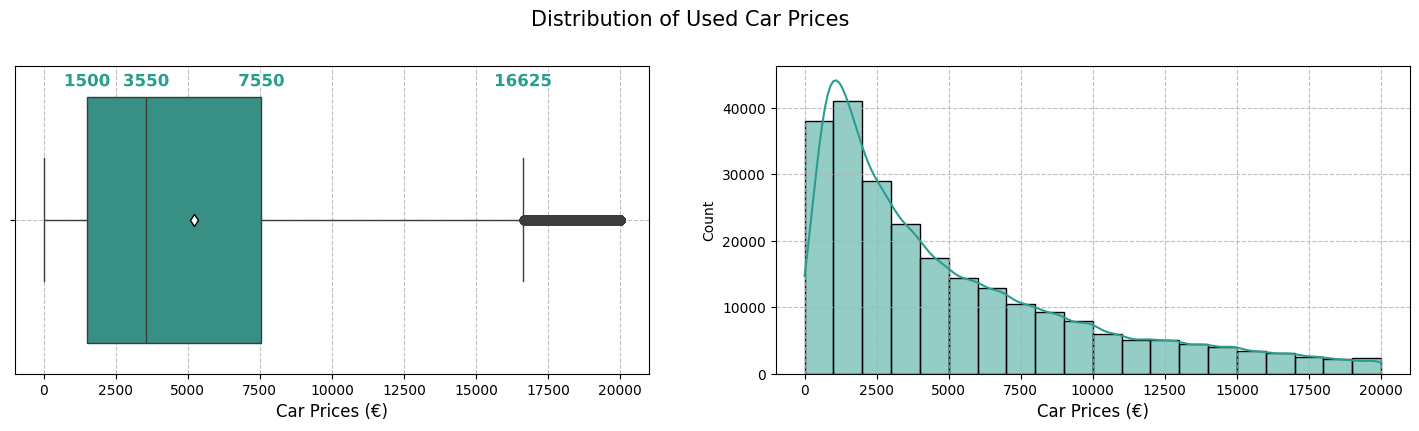

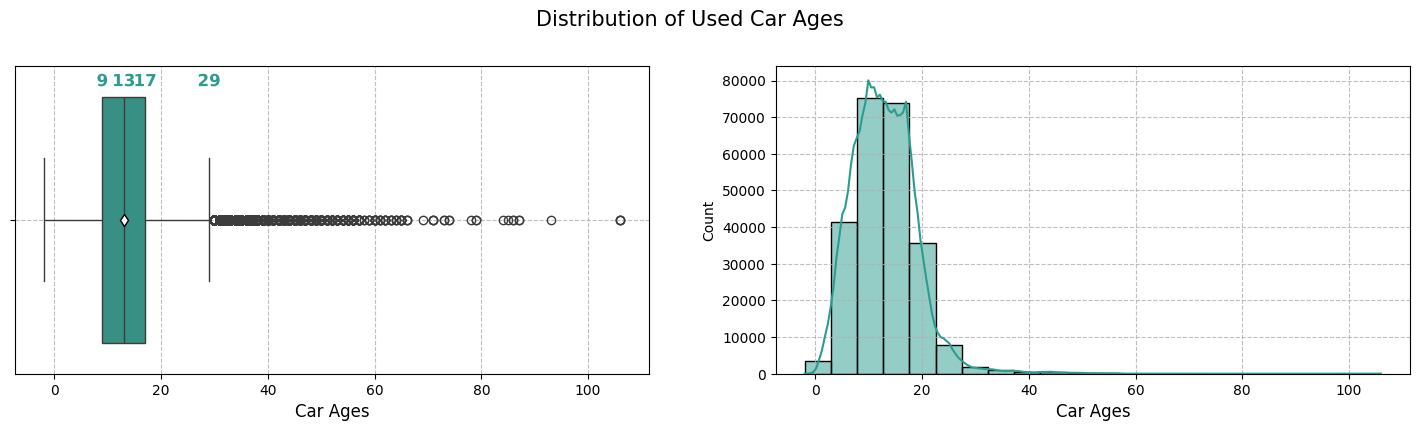

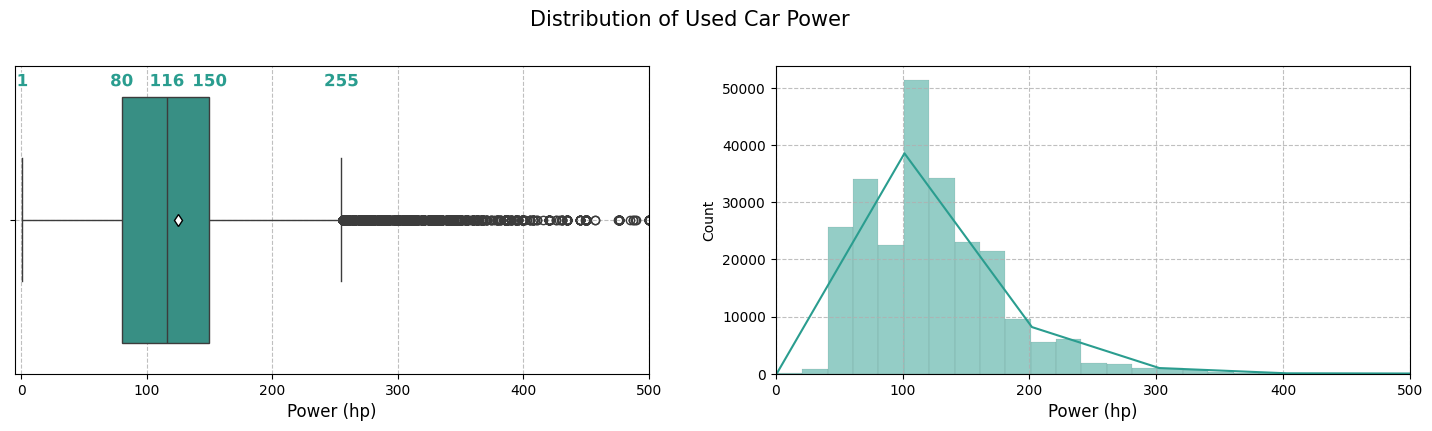

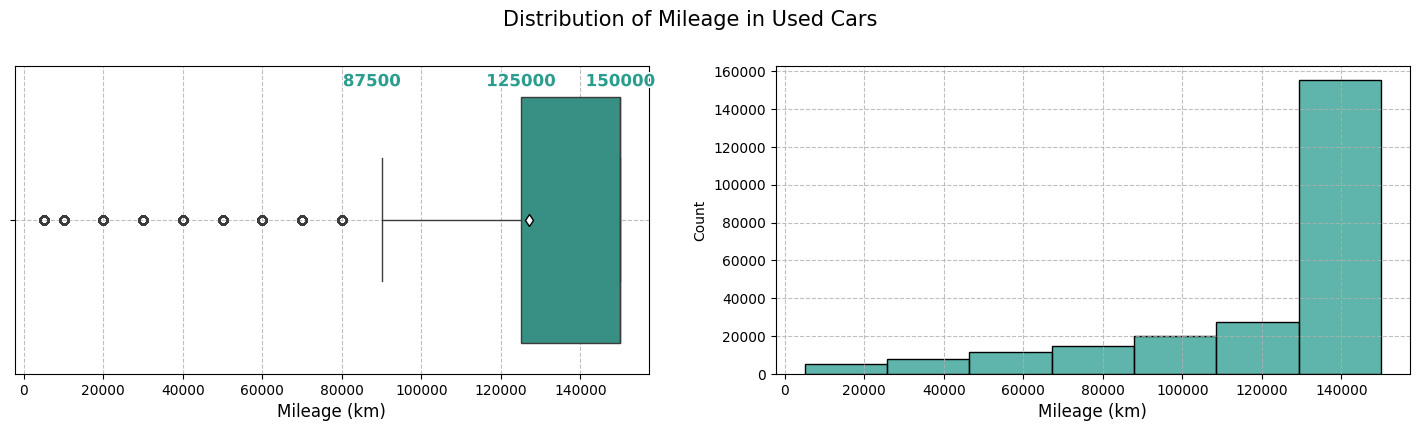

In [35]:
# distribusi data numerik -- 'Price'
box_hist_plot(df=eda_df, column='Price', size=(18,4), width=1000, title="Distribution of Used Car Prices",
                y_title=1.02, xlabel='Car Prices (\u20AC)')

# distribusi data numerik -- 'Age'
box_hist_plot(df=eda_df, column='Age', size=(18,4), width=5, title="Distribution of Used Car Ages",
                y_title=1.02, xlabel='Car Ages')

# distribusi data numerik -- 'Power'
box_hist_plot(df=eda_df, column='Power', size=(18,4), width=20, title='Distribution of Used Car Power',
                y_title=1.02, xlabel='Power (hp)', l_xlim=(-5,500), r_xlim=(0,500))

# distribusi data numerik -- 'Mileage'
box_hist_plot(df=eda_df, column='Mileage', size=(18,4), width=20000, title='Distribution of Mileage in Used Cars',
                y_title=1.02, xlabel='Mileage (km)', kde=False)

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* **Data harga dan jarak tempuh kendaraan memiliki distribusi yang tidak simetris**. Untuk data harga memiliki distribusi *right-skew* sedangkan data jarak tempuh memiliki distribusi *left-skew*. Pada data jarak tempuh, **75% kendaraan pada dataset memiliki jarak tempuh pada rentang 125,000 - 150,000 km**.
* Data usia kendaraan terdistribusi secara simetris. **Usia tipikal mobil bekas pada dataset ini yaitu 9-17 tahun**, tetapi terdapat sebagian kecil mobil bekas yang berusia lebih dari 30 tahun. **Pada distribusi ini, terlihat dengan jelas data kendaraan berusia negatif**.
* **Hanya sebagian kecil kendaraan yang memiliki power lebih dari 255 hp**. Pada distribusi ini, terlihat sebagian kecil kendaraan yang memiliki *power* kurang dari 40 hp dan terindikasi sebagai *outliers*.

</div>



<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Nilai yang abnormal pada variabel numerik merupakan sebuah *outliers* yang harus disingkirkan sebelum melatih model. Berikut merupakan data-data numerik yang diindikasi sebagai *outliers* beserta indikatornya:
    * **Harga mobil (`'Price'`)**.<br>
    Selain mobil dengan harga &#x20AC;0.00, *outliers* juga dapat diidentifikasi menggunakan metode *interquartilrange (IQR)* berdasarkan pengelompokan karakteristik mobil seperti merek, jenis kendaraan, dsb.
    * **Usia mobil (`'Age'`)**.<br>
    Data usia kendaraan yang dikategorikan *outliers* adalah kendaraan dengan usia negatif.
    * ***Power* mobil (`'Power'`)**.<br>
    Mobil dengan *power* yang terlalu besar dan kecil merupakan indikator *outliers*. Pada batas bawah, mobil dengan tenaga kurang dari 40 hp akan dianggap sebagai *outliers*. Adapun pada batas atas, mobil dengan tenaga lebih dari 2000 hp juga akan dianggap sebagai *outliers* karena tidak ada satupun *supercar* yang memiliki power lebih dari itu hingga tahun 2023 ini.

</div>



## <a id='toc5_2_'></a>[2) Variasi Harga Mobil Pada Masing-masing Merek](#toc0_)

Berikut di bawah ini merupakan distribusi harga mobil bekas untuk masing-masing merek kendaraan. Distribusi harga kendaraan akan ditampilkan dalam format *boxplot* dan data harga rata-rata kendaraan akan ditampilkan pada *barplot*.

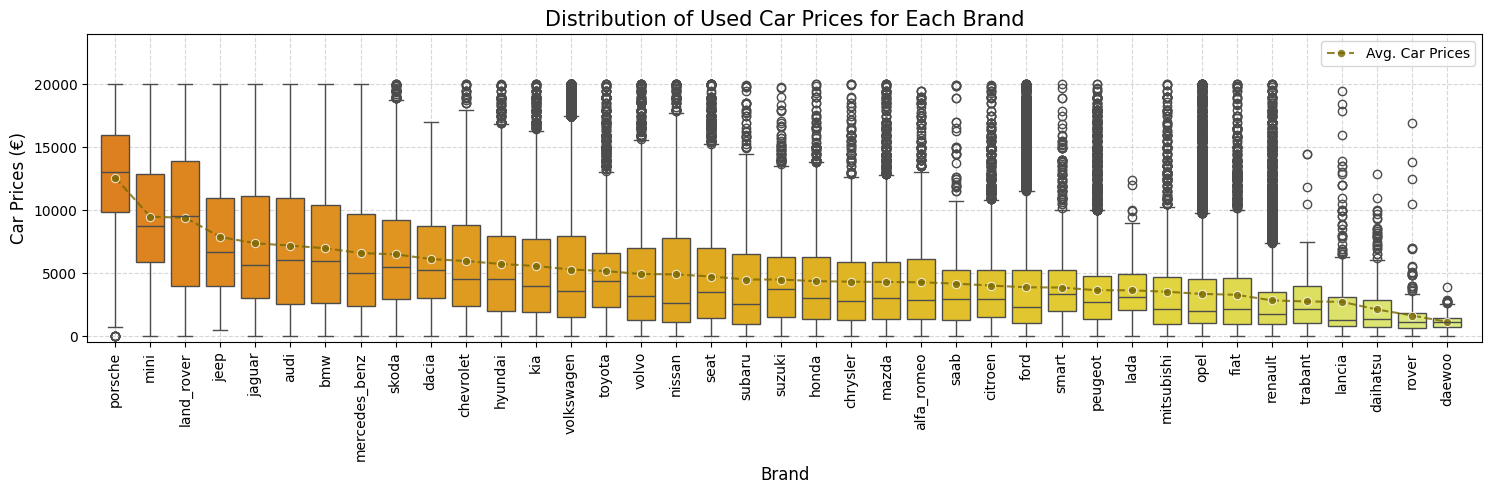

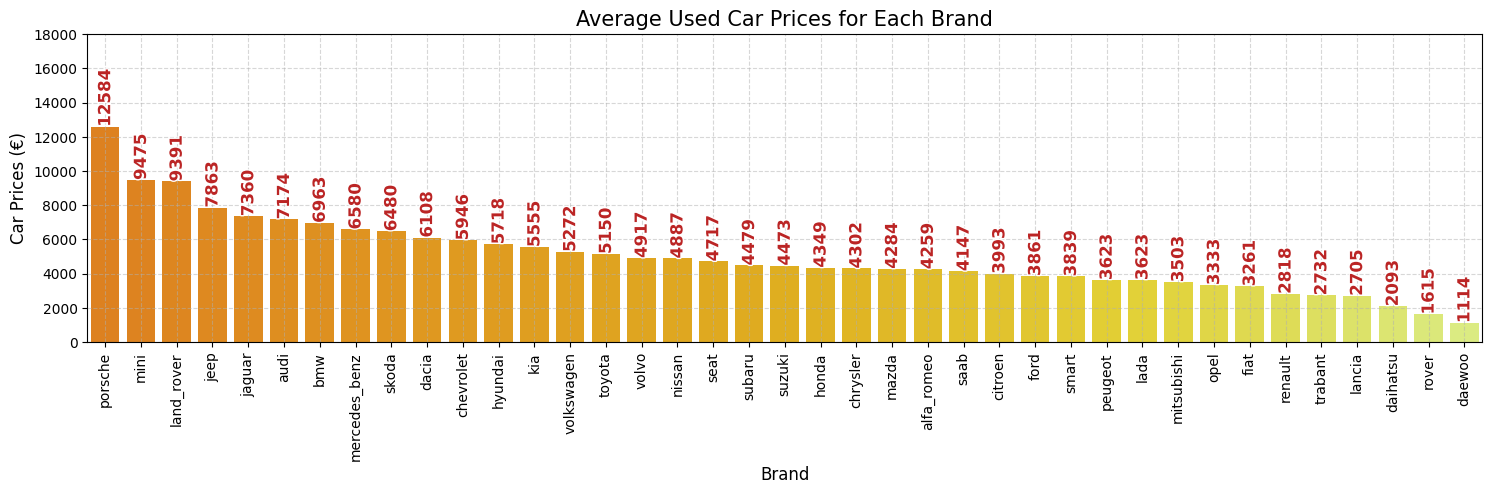

In [36]:
# distribusi harga kendaraan pada setiap merek
line_box_plot(df=eda_df, x='Brand', y='Price', figsize=(18,4), ascending_order=False, rot=90, 
                ylabel='Car Prices (\u20AC)', xlabel='Brand', title='Distribution of Used Car Prices for Each Brand', 
                line_label='Avg. Car Prices', ylim=(-500,24000), xlim=(-0.8,39))

# harga rata-rata mobil bekas pada setiap merek
agg_barplot(df=eda_df, x='Brand', y='Price', figsize=(18,4), ascending_order=False, rot=90, ylim=(0, 18000),
            xlabel='Brand', ylabel='Car Prices (\u20AC)', title='Average Used Car Prices for Each Brand')

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* **Top 5** merek mobil bekas dengan harga termahal, yaitu **Porsche**, **Mini**, **Land-Rover**, **Jeep**, dan **Jaguar**.
* Secara umum, distribusi harga mobil bekas pada masing-masing *brand* memiliki distribusi *right-skew*.
* Hampir seluruh merek mobil bekas memiliki profil kendaraan yang dijual dengan harga senilai &#x20AC;0.00. Data tersebut kemungkinan merupakan *outlier* yang harus dikeluarkan dari dataset.

</div>



<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* **4 dari 5 merek mobil bekas termahal merupakan produksi Eropa**. Hanya **Jeep** mobil termahal yang dibuat di luar Eropa, yaitu buatan Amerika.
* Distribusi *right-skew* pada setiap brand menunjukkan mayoritas mobil bekas pada masing-masing *brand* memiliki harga dibawah rata-rata.
* *Outlier* harga kendaraan bernilai &#x20AC;0.00 tidak hanya ditemukan pada merek-merek tertentu, tetapi hampir hampir pada setiap merek.

</div>



## <a id='toc5_3_'></a>[3) Pengaruh Tipe Kendaraan Terhadap Harga Mobil](#toc0_)

Berikut di bawah ini merupakan distribusi harga mobil bekas untuk masing-masing tipe kendaraan. Distribusi harga kendaraan akan ditampilkan dalam format *boxplot* dan data harga rata-rata kendaraan akan ditampilkan pada *barplot*.

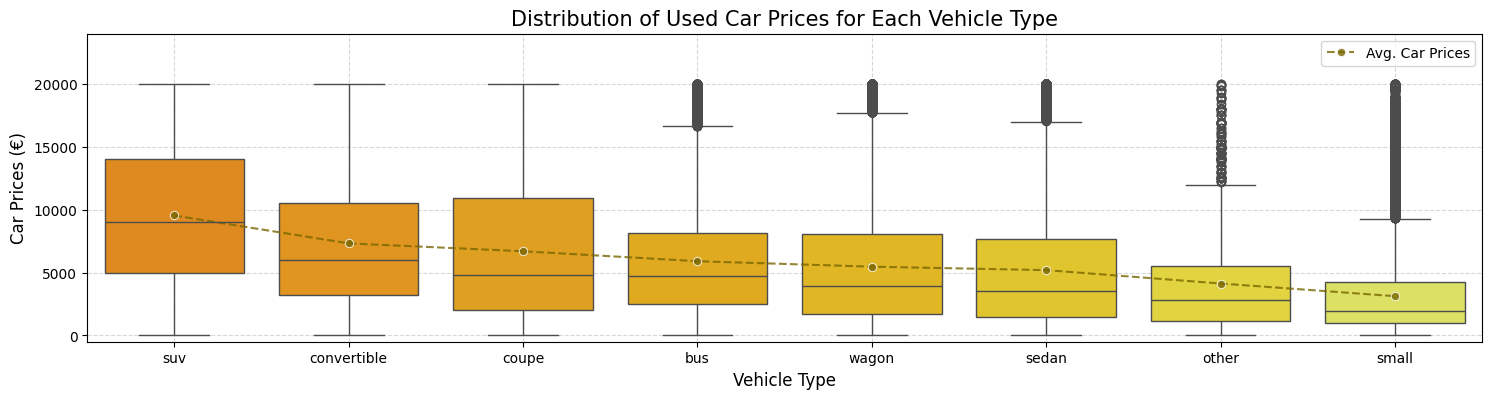

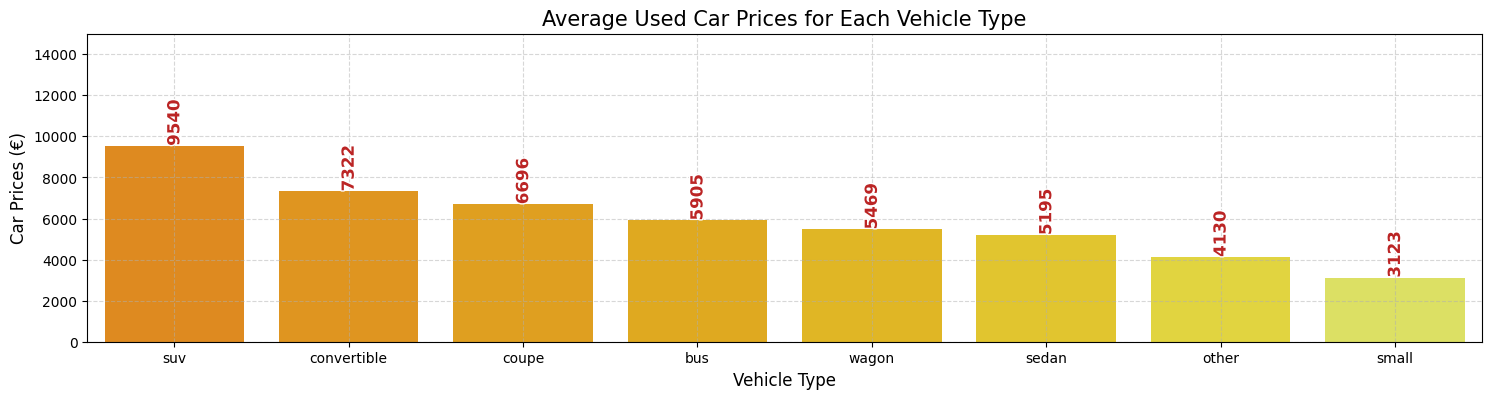

In [37]:
# distribusi harga kendaraan pada setiap tipe kendaraan
line_box_plot(df=eda_df, x='VehicleType', y='Price', figsize=(18,4), ascending_order=False, rot=0, 
                ylabel='Car Prices (\u20AC)', xlabel='Vehicle Type', title='Distribution of Used Car Prices for Each Vehicle Type',
                line_label='Avg. Car Prices', ylim=(-500,24000), xlim=(-0.5,7.5))

# harga rata-rata mobil bekas pada setiap tipe kendaraan
agg_barplot(df=eda_df, x='VehicleType', y='Price', figsize=(18,4), ascending_order=False, rot=0, ylim=(0, 15000),
            xlabel='Vehicle Type', ylabel='Car Prices (\u20AC)', title='Average Used Car Prices for Each Vehicle Type')

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* **Top 3** tipe mobil bekas dengan harga termahal, yaitu **SUV**, **Convertible**, dan **Coupe**.
* Distribusi harga mobil bekas pada masing-masing tipe memiliki distribusi *right-skew*. Hanya tipe **SUV** yang dapat dikatakan memiliki distribusi harga yang simetris.
* Kendaraan dengan harga &#x20AC;0.00 ditemukan pada masing-masing tipe kendaraan.
</div>



<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Dari 3 tipe kendaraan dengan harga termahal, hanya **SUV** yang berukuran besar dan cocok sebagai mobil keluarga sedangkan 2 lainnya merupakan mobil yang berukuran relatif kecil. Mobil **Convertibel** dengan ciri khasnya yaitu *roof* yang dapat dibuka menjadi nilai lebih sedangkan tipe **Coupe** memiliki keunggulan dari sisi aerodinamika dan identik dengan 2 pintu yang memberikan tampilan yang lebih *sporty* dan dinamis.
* Distribusi *right-skew* pada setiap tipe kendaraan menunjukkan mayoritas mobil bekas pada masing-masing tipe memiliki harga dibawah rata-rata.
* *Outlier* harga kendaraan bernilai &#x20AC;0.00 ditemukan pada seluruh tipe- kendaraan, hal ini menujukkan *outlier* tersebut tidak terkait dengan tipe kendaraan tertentu.

</div>



## <a id='toc5_4_'></a>[4) Bagaimana Jenis Bahan Bakar Mempengaruhi Harga Mobil?](#toc0_)

Berikut di bawah ini merupakan distribusi harga mobil bekas untuk masing-masing jenis bahan bakar yang digunakan. Distribusi harga kendaraan akan ditampilkan dalam format *boxplot* dan data harga rata-rata kendaraan akan ditampilkan pada *barplot*.

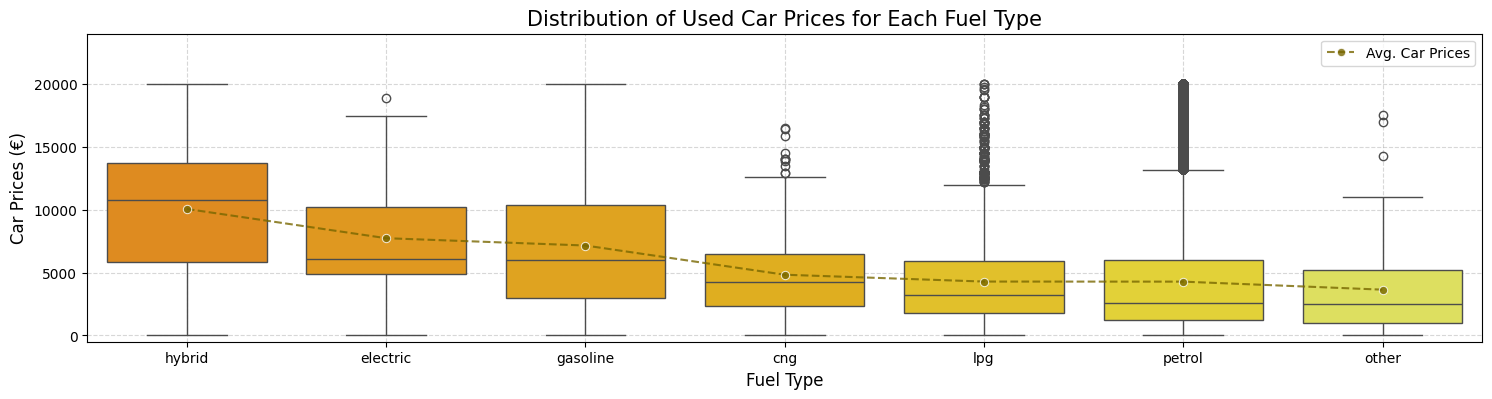

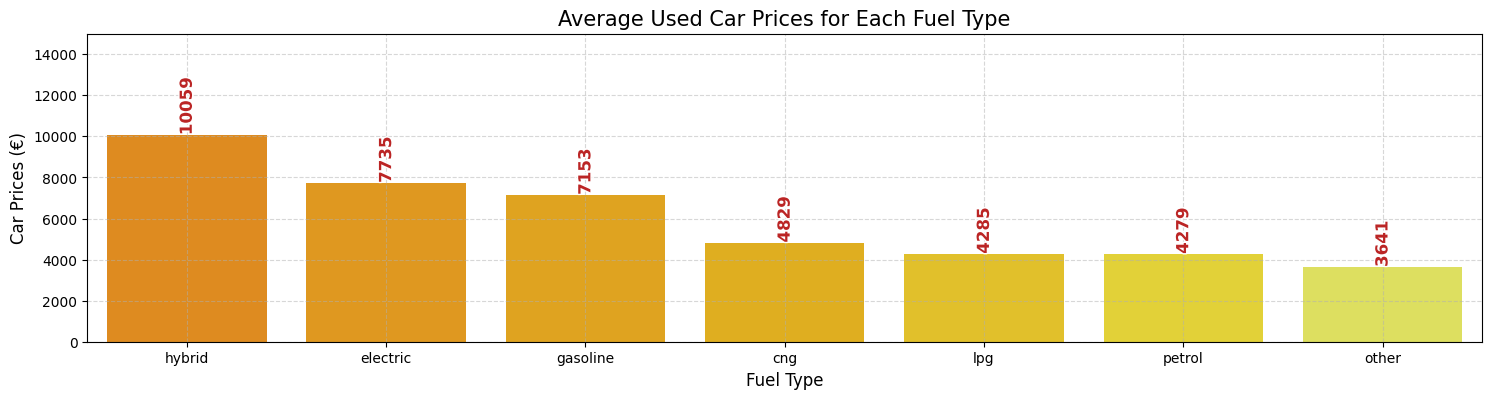

In [38]:
# distribusi harga kendaraan pada setiap jenis bahan bakar
line_box_plot(df=eda_df, x='FuelType', y='Price', figsize=(18,4), ascending_order=False, rot=0, 
                ylabel='Car Prices (\u20AC)', xlabel='Fuel Type', title='Distribution of Used Car Prices for Each Fuel Type',
                line_label='Avg. Car Prices', ylim=(-500,24000), xlim=(-0.5,6.5))

# harga rata-rata mobil bekas pada setiap jenis bahan bakar
agg_barplot(df=eda_df, x='FuelType', y='Price', figsize=(18,4), ascending_order=False, rot=0, ylim=(0, 15000),
            xlabel='Fuel Type', ylabel='Car Prices (\u20AC)', title='Average Used Car Prices for Each Fuel Type')

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* **Top 3** mobil bekas dengan harga termahal berdasarkan bahan bakar yang digunakan, yaitu mobil **Hybrid**, **Electric** dan **Gasoline**.
* Dari seluruh tipe kendaraan, hanya mobil **Hybrid** bekas yang memiliki harga tipikal (median) di atas rata-rata, sedangkan tipe lainnya memiliki harga tipikal di bawah rata-rata.

</div>



<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Dari 3 jenis kendaraan tersebut, 2 diantaranya merupakan sumber energi non-fosil, yaitu **Hybrid** dan **Electric**. Teknologi yang lebih maju mengakibatkan mobil non-fosil tersebut memiliki harga yang lebih mahal. Adapun mobil **Gasoline** merupakan tipe mobil yang umum digunakan karena kemudahan perolehan energi.
* Harga tipikal (median) dapat menjadi acuan harga wajar kendaraan diakibatkan data yang memiliki kemiringan distribusi.

</div>



## <a id='toc5_5_'></a>[5) Harga Mobil Untuk Jenis Transmisi yang Berbeda](#toc0_)

Berikut di bawah ini merupakan distribusi harga mobil bekas untuk masing-masing jenis transmisi yang digunakan. Distribusi harga kendaraan akan ditampilkan dalam format *boxplot* dan data harga rata-rata kendaraan akan ditampilkan pada *barplot*.

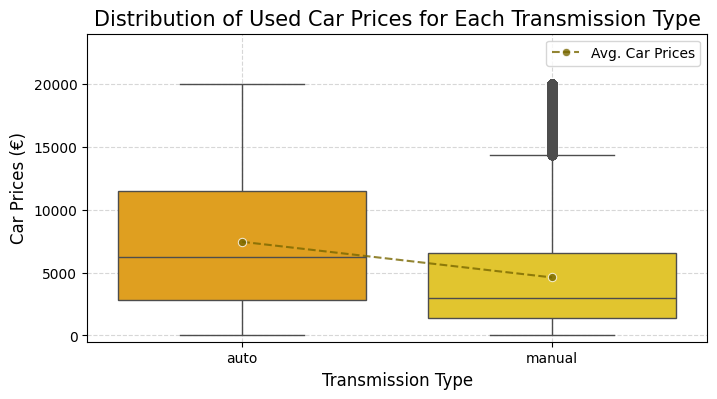

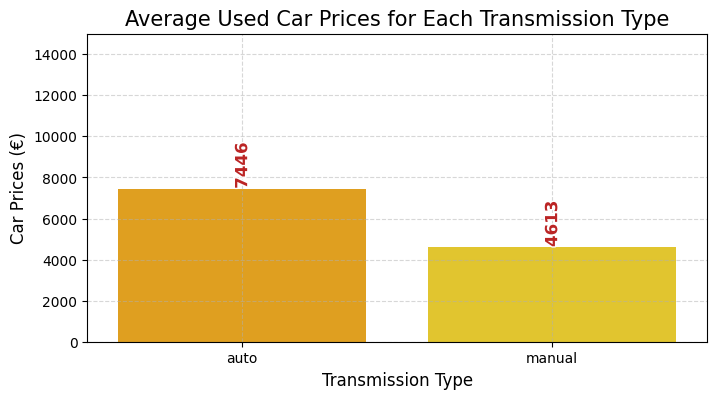

In [39]:
# distribusi harga kendaraan pada setiap jenis transmisi
line_box_plot(df=eda_df, x='Gearbox', y='Price', figsize=(8,4), ascending_order=False, rot=0, 
                ylabel='Car Prices (\u20AC)', xlabel='Transmission Type', 
                title='Distribution of Used Car Prices for Each Transmission Type',
                line_label='Avg. Car Prices', ylim=(-500,24000), xlim=(-0.5,1.5))

# harga rata-rata mobil bekas pada setiap jenis transmisi
agg_barplot(df=eda_df, x='Gearbox', y='Price', figsize=(8,4), ascending_order=False, rot=0, ylim=(0, 15000),
            xlabel='Transmission Type', ylabel='Car Prices (\u20AC)', 
            title='Average Used Car Prices for Each Transmission Type')

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Mobil dengan transmisi **Automatic** memiliki harga tipikal yang lebih besar dari transmisi **Manual**.
* Rata-rata harga jual mobil **Automatic** 60% lebih mahal dari rata-rata harga jual mobil **Manual**.

</div>



<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Teknologi yang lebih tinggi dan kemudahan yang diberikan pada pengguna mengakibatkan mobil **Automatic** memiliki harga jual yang lebih tinggi.

</div>



## <a id='toc5_6_'></a>[6) Korelasi Antar Variabel Numerik](#toc0_)

Untuk mengetahui bagaimana hubungan antar fitur numerik, maka kita perlu melakukan perhitungan korelasi *Pearson*. Berikut di bawah ini akan ditampilkan *heatmap plot* yang menunjukkan nilai korelasi antar variabel tersebut.

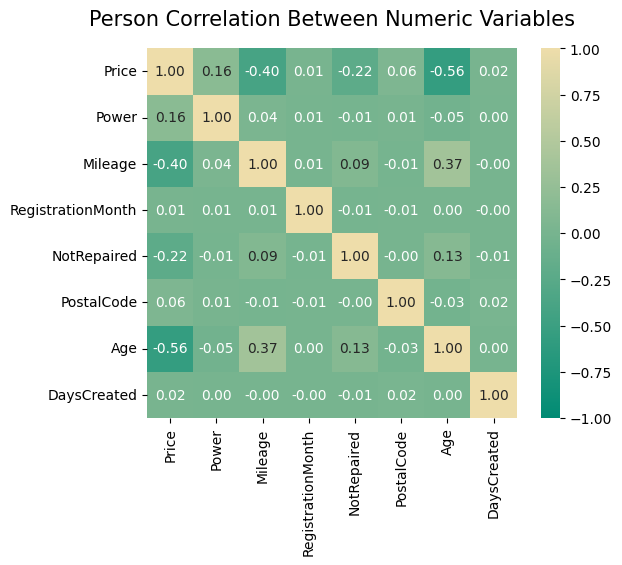

In [40]:
# korelasi peparson antar variabel numerik
sns.heatmap(data=eda_df.corr(numeric_only=True), annot=True, square=True, vmax=1, vmin=-1
            , cmap=sns.color_palette("blend:#008B74,#EDA", as_cmap=True), fmt='.2f')
plt.title("Person Correlation Between Numeric Variables", y=1.04, size=15)
plt.show()

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Variabel `'Mileage'`, `'NotRepaired'` dan `'Age'` menunjukkan korelasi yang kuat terhadap variabel `'Price'` dibandingkan variabel lainnya. 
* Hubungan variabel `'Price'` terhada variabel `'Mileage'`, `'NotRepaired'` dan `'Age'` menujukkan korelasi negatif, yang berarti peningkatan ketiga variabel tersebut akan menurunkan nilai variabel `'Price'`.

</div>



<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Usia mobil yang lebih tua, jarak tempuh yang lebih tinggi serta kondisi mobil yang belum diperbaiki, akan mengakibatkan harga jual mobil tersebut bernilai lebih rendah.

</div>



## <a id='toc5_7_'></a>[7) Penanganan *Outliers*](#toc0_)

Pada bagian sebelumnya, ditemukan sejumlah *outliers* pada dataset. Keberadaan *outliers* pada data daat mengganggu proses pelatihan dan evaluasi model sehingga perlu dikeluarkan dari dataset. Adapun sejumlah *outliers* yang  ditemukan, antara lain:
* ***Outliers* pada data `'Price'`.**<br>
Pada data ini ditemukan *outliers* yaitu data kendaraan yang memiliki harga sebesar &#x20AC;0.00. Selain itu, ditemukan pula sejumlah kendaraan yang memiliki harga terlalu tinggi dan tidak wajar.

* ***Outliers* pada data `'Power'`.**<br>
Indikator *outlier* dasar pada data ini adalah kendaraan yang memiliki *power* kurang dari 40 hp dan lebih dari 2000 hp. Indikator tersebut berlandaskan pada fakta bahwa tidak ada kendaraan komersil yang memiliki *power* kurang dari 40 hp serta belum ada *supercar* yang memiliki *power* lebih dari 2000 hp hingga tahun 2023.

* ***Outliers* pada data `'Age'`.**<br>
Pada data ini ditemukan sejumlah data, dimana usia kendaraan bernilai negatif. Hal tersebut kita anggap sebagai *outliers* dan pperlu dikeluarkan dari dataset.

Berdasarkan indikator *outliers* di atas, berikut adalah langkah-langkah yang akan dilakukan untuk mengeluarkan *outliers* tersebut dari dataset:
1. Melakukan *query* untuk kendaraan dengan harga lebih dari &#x20AC;0.00, *power* tidak lebih dari 2000 hp dan tidak kurang dari 40 hp, serta usia kendaraan yang bernilai tidak kurang dari nol.
2. Melakukan penyaringan *outliers* menggunakan metode ***interquartil range* (IQR)** untuk data `'Price'` dan `'Power'` untuk mengeluarkan data-data yang bernilai terlalu tinggi maupun terlalu rendah. Dalam melakukan penyaringan ini, nilai *upper-bound* dan *lower-bound* **IQR** akan dihitung berdasarkan pengelompokan merek kendaraan (`'Brand'`) dan tipe kendaraan (`'VehicleType'`).

Berikut di bawah ini, akan dilakukan proses filtrasi *outliers* dari dataset.

In [41]:
# function untuk menghitung lower-bound IQR.
def iqr_lowerbound(data:pd.Series):
    q1 = np.quantile(data, q=0.25)
    q3 = np.quantile(data, q=0.75)
    iqr = q3 - q1
    return q1 - 1.5*iqr 

# function untuk menghitung upper-bound IQR.
def iqr_upperbound(data:pd.Series):
    q1 = np.quantile(data, q=0.25)
    q3 = np.quantile(data, q=0.75)
    iqr = q3 - q1
    return q3 + 1.5*iqr

# function untuk filter outlier dengan metode IQR.
def iqr_outlier_filter(data:pd.DataFrame, column:str, group_by:list[str]=None):
    df = data.copy()
    # filter outlier tanpa pengelompokan
    if not group_by:
        lower_bound = iqr_lowerbound(df[column])
        upper_bound = iqr_upperbound(df[column])
        return df[(df[column]<=upper_bound)&(df[column]>=lower_bound)].reset_index(drop=True)
    
    # filter outlier dengan pengelompokan.
    else:
        data_reff = df.groupby(group_by)[column].agg([iqr_lowerbound, iqr_upperbound]).reset_index() 
        data_merge = df.merge(right=data_reff, how='left', on=group_by)
        data_merge['is_outlier'] = (data_merge[column]>data_merge['iqr_upperbound'])|(data_merge[column]<data_merge['iqr_lowerbound'])
        data_return = data_merge[~data_merge['is_outlier']].drop(['iqr_lowerbound','iqr_upperbound','is_outlier'], axis=1)
        return data_return.reset_index(drop=True)

# function untuk mengeluarkan ourliers dari dataset untuk proyek ini.
def outliers_handling(data):
    df = data.copy()
    df = df[(df['Price']>0)&((df['Power']<=2000)&(df['Power']>=40))&(df['Age']>=0)]
    df = iqr_outlier_filter(data=df, column='Price', group_by=['Brand', 'VehicleType'])
    df = iqr_outlier_filter(data=df, column='Power', group_by=['Brand', 'VehicleType'])
    return df.reset_index(drop=True)

In [42]:
eda_df_outliers_filter = outliers_handling(eda_df)

# output
print(f"Ukuran dataset : {eda_df_outliers_filter.shape}")
eda_df_outliers_filter.sample(5)

Ukuran dataset : (219856, 13)


,Price,VehicleType,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,PostalCode,Age,DaysCreated
17855,18999,wagon,auto,232,a4,150000,3,gasoline,audi,0,74078,8,84
84630,1099,sedan,manual,116,croma,90000,1,petrol,fiat,0,97618,24,95
212920,9750,small,manual,75,one,70000,1,petrol,mini,0,42897,6,91
196467,3250,other,manual,140,other,90000,9,gasoline,hyundai,1,58285,8,86
149008,14999,bus,manual,131,transporter,150000,4,gasoline,volkswagen,0,18334,9,81


Berikut akan ditampilkan perbandingan dataset sebelum dan sesudah *outliers* dikeluarkan. Perbandingan yang akan dilakukan adalah perbandingan statistika deskriptif pada variabel numerik dan perbandingan visualisasi untuk variabel `'Price'`, `'Power'` dan `'Age'`.

In [43]:
# perbandingan statisitika deskriptif -- sebelum outliers filtering
eda_df[['Price','Age', 'Power', 'Mileage', 'DaysCreated', 'RegistrationMonth']].describe().T

,count,mean,std,min,25%,50%,75%,max
Price,241359.0,5208.270120,4725.472493,0.0,1500.0,3550.0,7550.0,20000.0
Age,241359.0,12.959890,6.101561,-2.0,9.0,13.0,17.0,106.0
Power,241359.0,125.084944,160.005456,1.0,80.0,116.0,150.0,20000.0
Mileage,241359.0,127077.258358,37087.481423,5000.0,125000.0,150000.0,150000.0,150000.0
DaysCreated,241359.0,80.851624,9.472129,2.0,73.0,81.0,89.0,364.0
RegistrationMonth,241359.0,6.372677,3.352647,1.0,3.0,6.0,9.0,12.0


In [44]:
# perbandingan statisitika deskriptif -- sesudah outliers filtering
eda_df_outliers_filter[['Price','Age', 'Power', 'Mileage', 'DaysCreated', 'RegistrationMonth']].describe().T

,count,mean,std,min,25%,50%,75%,max
Price,219856.0,4861.765569,4391.749623,1.0,1500.0,3400.0,6950.0,20000.0
Age,219856.0,13.161428,5.745690,0.0,9.0,13.0,17.0,106.0
Power,219856.0,118.503812,47.254367,40.0,80.0,111.0,147.0,409.0
Mileage,219856.0,129429.626665,34756.457008,5000.0,125000.0,150000.0,150000.0,150000.0
DaysCreated,219856.0,80.840541,9.426501,2.0,73.0,81.0,89.0,364.0
RegistrationMonth,219856.0,6.380094,3.353463,1.0,3.0,6.0,9.0,12.0


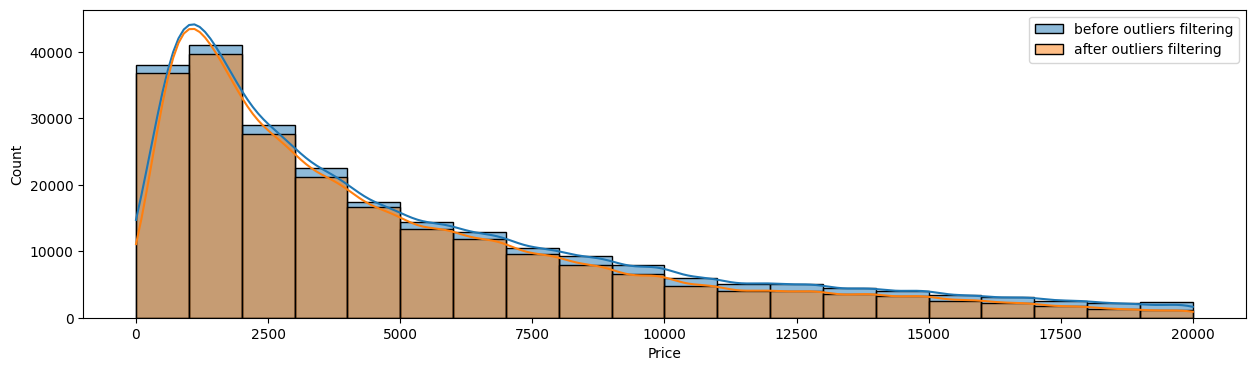

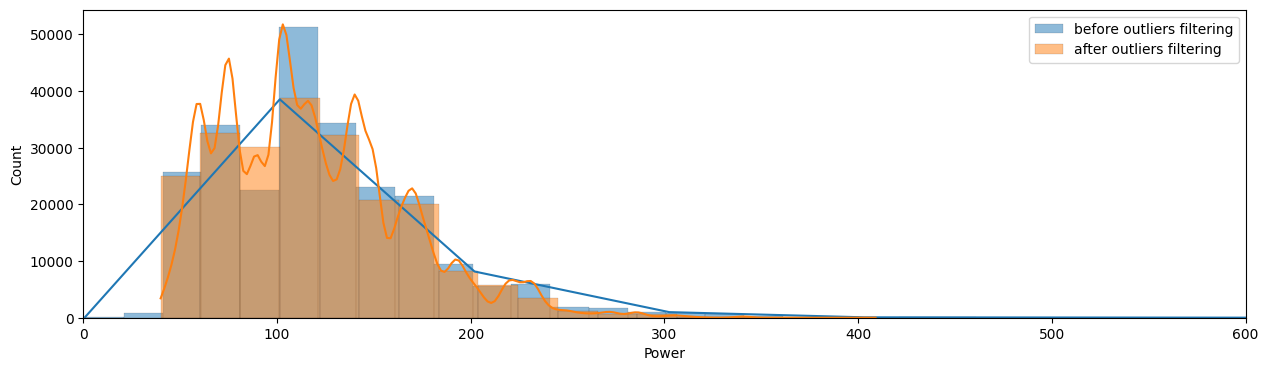

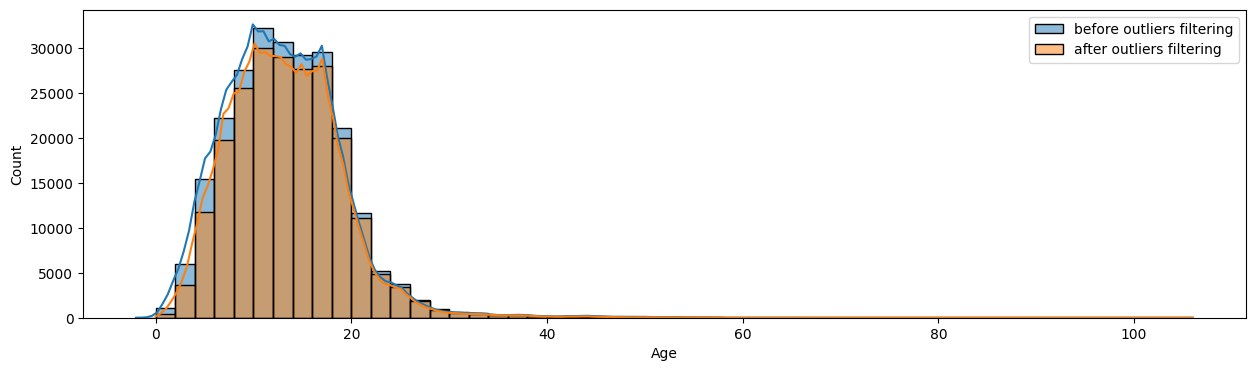

In [45]:
# perbandingan visualisasi -- variabel 'Price'
plt.figure(figsize=(15,4))
sns.histplot(eda_df['Price'], binwidth=1000, alpha=0.5, kde=True, label='before outliers filtering')
sns.histplot(eda_df_outliers_filter['Price'], binwidth=1000, alpha=0.5, kde=True, label='after outliers filtering')
plt.legend()
plt.show()

# perbandingan visualisasi -- variabel 'Power'
plt.figure(figsize=(15,4))
sns.histplot(eda_df['Power'], binwidth=20, alpha=0.5, kde=True, label='before outliers filtering')
sns.histplot(eda_df_outliers_filter['Power'], binwidth=20, alpha=0.5, kde=True, label='after outliers filtering')
plt.xlim(0,600)
plt.legend()
plt.show()

# perbandingan visualisasi -- variabel 'Age'
plt.figure(figsize=(15,4))
sns.histplot(eda_df['Age'], binwidth=2, alpha=0.5, kde=True, label='before outliers filtering')
sns.histplot(eda_df_outliers_filter['Age'], binwidth=2, alpha=0.5, kde=True, label='after outliers filtering')
# plt.xlim(0,600)
plt.legend()
plt.show()

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Setelah dilakukan *outliers filtering*, data tereduksi sebanyak 21,503 observasi atau setara dengan 8.91% data sebelumnya.
* Pada data yang telah difilter, sudah tidak ditemukan kendaraan yang memiliki harga &#x20AC; 0.00, memiliki usia negatif serta memiliki *power* kurang dari 40 hp dan lebih dari 2000 hp.
* Berdasarkan histogram, pengikisan *outliers* banyak terjadi pada kendaraan dengan harga lebih tinggi dan kendaraan dengan usia lebih rendah.

</div>



<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Faktor *outliers* pada harga kendaraan disebabkan oleh estimasi berlebih yang dilakukan pengguna karena usia kendaraan yang masih tergolong muda.

</div>



## <a id='toc5_8_'></a>[8) Kesimpulan](#toc0_)

Dari hasil **Analisa Data Eksploratif (EDA)** yang telah dilakukan, diperoleh kesimpulan sebagai berikut.
* Mayoritas mobil bekas pada data ini telah menempuh perjalanan sejauh 125,000 - 150,000 km.
* Usia tipikal mobil bekas yang pada dataset adalah 9 - 17 tahun.
* 5 merek kendaraan bekas termahal pada dataset, yaitu **Porsche**, **Mini**, **Land-Rover**, **Jeep**, dan **Jaguar**. **4 dari 5 merek mobil bekas termahal merupakan produksi Eropa**. Hanya **Jeep** mobil termahal yang dibuat di luar Eropa, yaitu buatan Amerika.
* 3 tipe mobil bekas termahal pada dataset, yaitu **SUV**, **Convertible**, dan **Coupe**. Dari 3 tipe kendaraan dengan harga termahal, hanya **SUV** yang berukuran besar sedangkan 2 lainnya merupakan mobil berukuran relatif kecil. Mobil **Convertibel** dengan ciri khasnya yaitu *roof* yang dapat dibuka menjadi nilai lebih sedangkan tipe **Coupe** memiliki keunggulan dari sisi aerodinamika dan identik dengan 2 pintu yang memberikan tampilan yang lebih *sporty* dan dinamis.
* 3 jenis mobil bekas termahal berdasarkan jenis bahan bakar yang digunakan, yaitu mobil **Hybrid**, **Electric** dan **Gasoline**. Dari 3 jenis kendaraan tersebut, 2 diantaranya merupakan sumber energi non-fosil, yaitu **Hybrid** dan **Electric**.
* Mobil dengan transmisi **Automatic** memiliki harga tipikal yang lebih besar dari transmisi **Manual**. Teknologi yang lebih tinggi dan kemudahan yang diberikan pada pengguna mengakibatkan mobil **Automatic** memiliki harga jual yang lebih tinggi.
* Variabel `'Mileage'`, `'NotRepaired'` dan `'Age'` menunjukkan korelasi yang kuat terhadap variabel `'Price'` dibandingkan variabel lainnya. Usia mobil yang lebih tua, jarak tempuh yang lebih tinggi serta kondisi mobil yang belum diperbaiki, akan mengakibatkan harga jual mobil tersebut bernilai lebih rendah.


Dari **Analisa Data Eksloratif (EDA)**, ditemukan sejumlah *outliers*. *Outliers* tersebut ditemukan pada data `'Price'`, `'Power'` dan `'Age'`. Berikut adalah langkah yang digunakan dalam menangani *outlier* tersebut:
1. Melakukan *query* untuk kendaraan dengan harga lebih dari &#x20AC; 0.00, *power* tidak lebih dari 2000 hp dan tidak kurang dari 40 hp, serta usia kendaraan yang bernilai tidak kurang dari nol.
2. Melakukan penyaringan *outliers* menggunakan metode ***interquartil range* (IQR)** untuk data `'Price'` dan `'Power'` untuk mengeluarkan data-data yang bernilai terlalu tinggi maupun terlalu rendah. Dalam melakukan penyaringan ini, nilai *upper-bound* dan *lower-bound* **IQR** akan dihitung berdasarkan pengelompokan merek kendaraan (`'Brand'`) dan tipe kendaraan (`'VehicleType'`).

Dari hasil penanganan *outliers* menggunakan metode di atas, diperoleh informasi:
* Pengikisan *outliers* banyak terjadi pada kendaraan dengan harga lebih tinggi dan kendaraan dengan usia lebih rendah.
* Faktor *outliers* pada harga kendaraan disebabkan oleh estimasi berlebih yang dilakukan pengguna karena usia kendaraan yang masih tergolong muda.



# <a id='toc6_'></a>[**F. Membangun Model *Machine-learning***](#toc0_)

## <a id='toc6_1_'></a>[1) *Features Engineering*](#toc0_)

### <a id='toc6_1_1_'></a>[**Membagi Dataset**](#toc0_)

Pada bagian ini, dataset akan dibagi menjadi 2 bagian, yaitu 70% untuk **Training Dataset** dan 30% untuk **Testing Dataset**.

In [46]:
# membagi dataset
training_set, testing_set = train_test_split(raw_df, test_size=0.3, random_state=101010)

Dataset telah dibagi dan kita perlu memeriksa keseimbangan kelas pada sejumlah fitur kategorik. Berikut adalah *barplot* yang menunjukkan proporsi masing-masing kelas di setiap variabel kategorik.

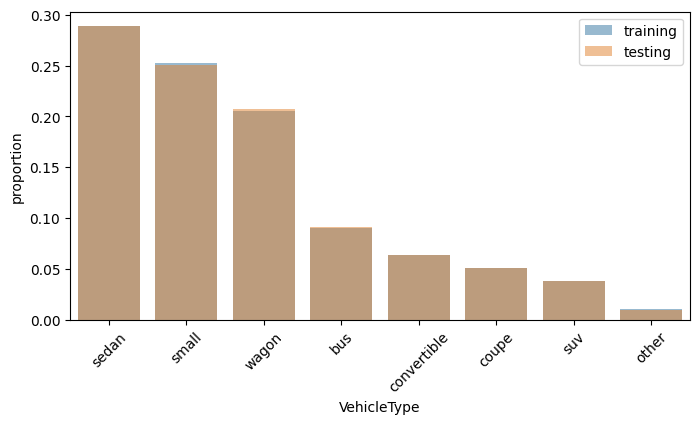

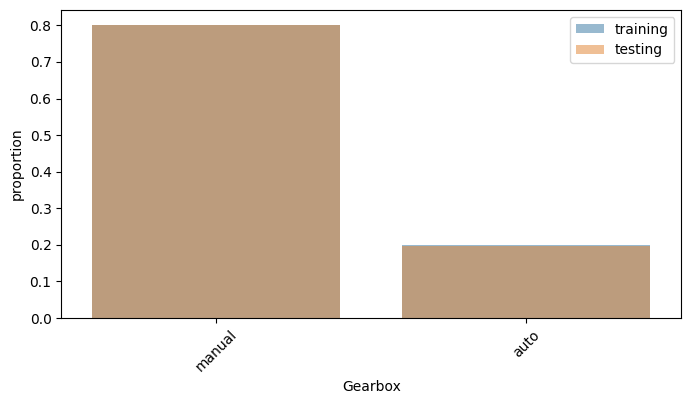

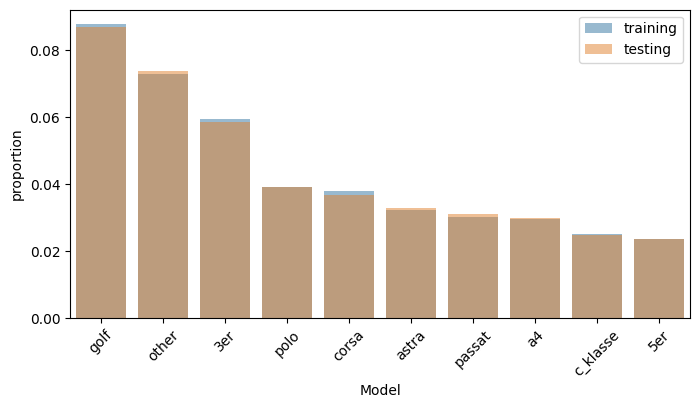

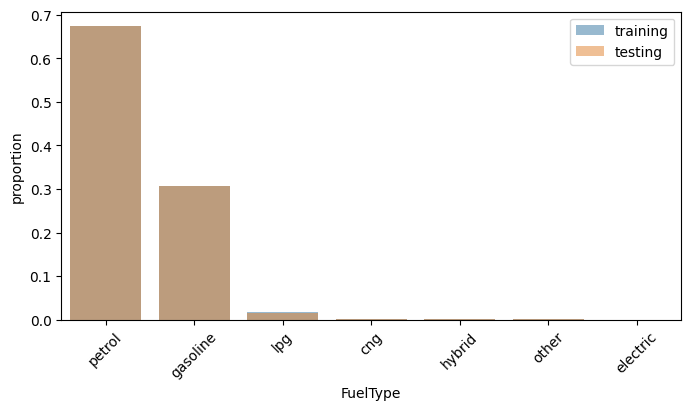

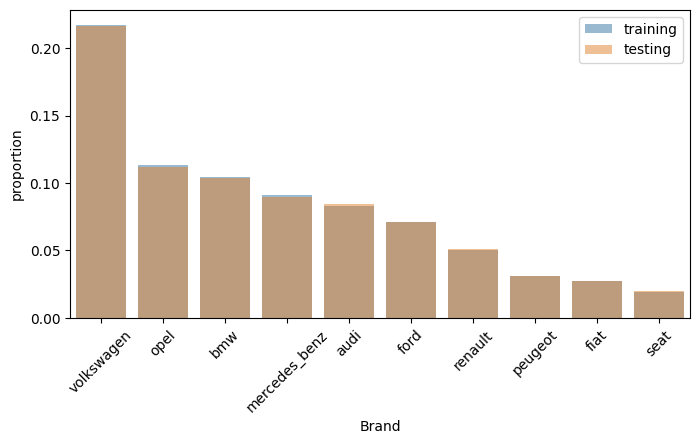

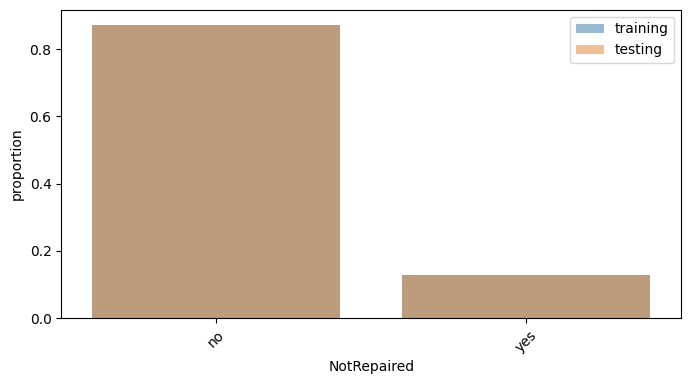

In [47]:
# visualisasi proporsi kelas untuk setiap fitur kategorik
cat_variable__ = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']
for var in cat_variable__:
    plt.figure(figsize=(8,4))
    sns.barplot(training_set[var].value_counts(True).head(10), alpha=0.5, label='training')
    sns.barplot(testing_set[var].value_counts(True).head(10), alpha=0.5, label='testing')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

Dari visualisasi di atas, terlihat bahwa proporsi masing-masing kelas pada setiap fitur kategorik antara **training dataset** dan **testing dataset** proporsional. Oleh karena itu, kita dapat masuk pada tahap berikutnya, yaitu perbaikan dataset.

### <a id='toc6_1_2_'></a>[**Perbaikan Data**](#toc0_)

Perbaikan **training set** dan **testing set** akan dilakukan dengan metode yang berbeda. Berikut adalah perbedaan perbaikan data antar kedua dataset:
* **Training Dataset**
    * Menghapus data duplikat.
    * `Mengisi dan menghapus observasi dengan` *`missing-value`*.
    * Memperbaiki tipe data.
    * Melakukan penambahan fitur.
    * Melakukan pengurangan fitur yang tidak perlu.
    * Penanganan *outliers*.
    
* **Testing Dataset**
    * Menghapus data duplikat.
    * `Menghapus observasi dengan` *`missing-value`*.
    * Memperbaiki tipe data.
    * Melakukan penambahan fitur.
    * Melakukan pengurangan fitur yang tidak perlu.
    * Penanganan *outliers*.

#### <a id='toc6_1_2_1_'></a>[a. Training Set](#toc0_)

Perbaikan **training dataset** akan dilakukan dengan metode yang sama dengan perbaikan dataset untuk **Analisa Data Eksploratif (EDA)**.


In [48]:
# perbaikan data training set
training_set_filter = data_prep(training_set)

# melakukan filter outliers
training_set_filter = outliers_handling(training_set_filter)

# output
print(f"Ukuran dataset : {training_set_filter.shape}")
training_set_filter.sample(5)

Ukuran dataset : (154126, 13)


,Price,VehicleType,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,PostalCode,Age,DaysCreated
97106,7000,suv,manual,79,other,150000,4,gasoline,volkswagen,0,88267,21,78
68341,5700,bus,manual,110,verso,150000,6,petrol,toyota,0,1454,11,94
76481,990,sedan,manual,75,80,150000,6,petrol,audi,1,25853,30,70
36094,9990,wagon,auto,170,e_klasse,150000,2,gasoline,mercedes_benz,0,45699,8,85
127408,9500,sedan,manual,69,golf,30000,9,petrol,volkswagen,0,65529,38,90


#### <a id='toc6_1_2_2_'></a>[b. Testing Set](#toc0_)

Perbedaan perbaikan **testing dataset** terhadap **training dataset** adalah tidak melakukan pengisian *missing-value*. Pada perbaikan  *testing set*, observasi dengan *missing value* akan dibuang seluruhnya. Berikut akan dilakukan perbaikan untuk **testing dataset**.

In [49]:
# perbaikan data testing set
## duplicate handling
testing_set_filter = duplicate_handling(testing_set).reset_index(drop=True)
## missing value handling
testing_set_filter = testing_set_filter.dropna()
testing_set_filter = testing_set_filter[(testing_set_filter['Power']>0)&(testing_set_filter['RegistrationMonth']>0)]
testing_set_filter = testing_set_filter.drop("NumberOfPictures", axis=1).reset_index(drop=True)
## data type handling
testing_set_filter = datatype_handling(testing_set_filter).reset_index(drop=True)
## data enrichment
testing_set_filter = data_enrichment(testing_set_filter)
## data reduction
testing_set_filter = data_reduction(testing_set_filter)

# melakukan filter outliers
testing_set_filter = outliers_handling(testing_set_filter)

# output
print(f"Ukuran dataset : {testing_set_filter.shape}")
testing_set_filter.sample(5)

Ukuran dataset : (62992, 13)


,Price,VehicleType,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,PostalCode,Age,DaysCreated
58038,2500,coupe,manual,170,focus,150000,12,petrol,ford,0,69190,14,93
3595,5500,wagon,manual,140,a3,150000,9,gasoline,audi,0,78054,9,92
47937,3990,sedan,manual,136,other,150000,9,gasoline,volvo,0,95213,12,95
7070,275,small,manual,58,twingo,150000,3,petrol,renault,0,34314,17,88
24888,5900,sedan,manual,169,other,150000,8,petrol,nissan,0,13585,23,89


#### <a id='toc6_1_2_3_'></a>[c. Memisahkan Data *Target* dan *Features*](#toc0_)

Berikut di bawah ini akan dilakukan pemisahan fitur dan target untuk memudahkan proses transformasi dan membuat model *machine-learning*.

In [50]:
# memisahakan fitur dan target
## fitur
x_train = training_set_filter.drop('Price', axis=1)
x_test = testing_set_filter.drop('Price', axis=1)

## target
y_train = training_set_filter['Price']
y_test = testing_set_filter['Price']

### <a id='toc6_1_3_'></a>[**Features Scaling**](#toc0_)

Pada bagian ini, sejumlah data numerik akan dilakukan *scaling* untuk mencegah dominasi peran salah satu fitur ketika melakukan prediksi. Proses *scaling* akan mengacu pada training dataset agar tidak terjadinya *data leakage* saat melatih model.

In [51]:
# melakukan feature scaling
num_variable = ['Power', 'Mileage', 'RegistrationMonth', 'Age', 'DaysCreated']
scaler = StandardScaler()
scaler.fit(x_train[num_variable])

## scaling training set
x_train_scale = pd.DataFrame(data = scaler.transform(x_train[num_variable]),
                                  columns=num_variable).join(x_train.drop(num_variable, axis=1))
## scaling testing set
x_test_scale = pd.DataFrame(data = scaler.transform(x_test[num_variable]),
                                  columns=num_variable).join(x_test.drop(num_variable, axis=1))

### <a id='toc6_1_4_'></a>[**One Hot Encoding**](#toc0_)

Sebelum melakukan **One Hot Encoding (OHE)**, kita perlu memeriksa kelengkapan kelas pada setiap fitur kategorik *training set*, apakah  setiap kelas pada setiap fitur kategorik *testing set* terdapat pada **training dataset**. Berikut di bawah ini akan dilakukan pemeriksaan tersebut.

In [52]:
# memeriksa kelengkapan kelas pada fitur kategorik training set
cat_variable = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired', 'PostalCode']
for i in cat_variable:
    train_unique = x_train_scale[i].unique()
    test_unique = x_test_scale[i].unique()
    diff = set(test_unique).difference(train_unique)
    if diff:
        print(f"Terdapat kelas di fitur '{i}' testing set yang tidak tersedia pada training set")
        print(f"Terdapat sebanyak {len(diff)} kelas, antara lain : \n{diff}\n")

Terdapat kelas di fitur 'Model' testing set yang tidak tersedia pada training set
Terdapat sebanyak 1 kelas, antara lain : 
{'phaeton'}

Terdapat kelas di fitur 'PostalCode' testing set yang tidak tersedia pada training set
Terdapat sebanyak 114 kelas, antara lain : 
{67587, 79367, 97289, 82447, 56349, 1068, 8237, 4655, 85045, 24637, 84553, 8267, 75339, 1616, 91737, 83546, 67167, 91744, 87650, 36469, 87674, 38528, 82067, 94359, 97957, 86700, 93356, 87736, 83129, 74937, 84169, 84187, 26844, 97503, 1762, 86754, 79595, 2796, 2797, 7919, 67824, 24817, 67827, 78586, 25855, 25862, 37640, 89352, 25864, 25868, 7950, 26906, 26907, 99102, 36142, 83250, 7989, 36154, 54587, 88379, 78141, 4928, 12625, 54610, 91474, 89431, 82279, 18279, 35689, 98667, 31087, 31094, 38275, 7557, 92549, 25992, 92554, 60308, 21398, 25497, 73114, 21403, 2979, 86949, 17322, 66987, 17337, 79289, 79807, 56769, 96193, 66504, 95691, 91599, 91601, 82387, 91604, 95706, 77787, 95197, 38879, 77794, 97252, 86502, 91622, 31718, 317

Dari hasil di atas, terlihat bahwa terdapat sebanyak 1 kelas pada fitur `'Model'` dan 114 kelas pada fitur `'PostalCode` pada *testing set* yang tidak tersedia pada *training set*. Hal ini dapat terjadi karena kedua fitur tersebut memiliki jumlah kelas yang sangat banyak dan terdapat sejumlah *infrequent category*.

Melakukan OHE pada fitur dengan kategori yang beragam dapat mengakibatkan ukuran dataset menjadi sangat besar. Oleh karena itu, saat melakukan OHE, kita hanya akan mengambil sejumlah kategori dengan frekuensi yang tinggi sedangkan kategori dengan frekuensi yang rendah akan dikelompokkan dalam 1 kelompok yang disebut **'infrequent_category'**. Untuk menentukan, berapa banyak kategori yang akan digunakan pada OHE (**`max_categories`**), maka kita perlu menghitung jumlah kelas pada setiap fitur kategorik.

Berikut merupakan jumlah kelas pada masing-masing fitur kategorik.

In [53]:
# menghitung jumlah kelas pada setiap fitur kategorik
cat_variable = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired', 'PostalCode']
for var in cat_variable:
    print(f"Jumlah kelas pada variabel '{var}': {x_train_scale[var].unique().shape[0]}")

Jumlah kelas pada variabel 'VehicleType': 8
Jumlah kelas pada variabel 'Gearbox': 2
Jumlah kelas pada variabel 'Model': 248
Jumlah kelas pada variabel 'FuelType': 7
Jumlah kelas pada variabel 'Brand': 39
Jumlah kelas pada variabel 'NotRepaired': 2
Jumlah kelas pada variabel 'PostalCode': 7923


Dari hasil di atas, maka kita akan menggunakan maksimal 50 kelas saat melakukan OHE, dimana salah satu dari 50 kelas tersebut merupakan kelas **'infrequent_category'**. 

In [54]:
# melakukan OHE pada variabel kategorik

## membuat transformer untuk OHE
ohe_enc = make_column_transformer(
    (OneHotEncoder(drop='if_binary', max_categories=50, dtype=int, 
                   handle_unknown='infrequent_if_exist', sparse_output=False), 
     ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired', 'PostalCode'])
    , remainder='passthrough'
    , verbose_feature_names_out=False)

## melakukan fitting
ohe_enc.fit(x_train_scale)

## melakukan transformasi OHE
x_train_final = pd.DataFrame(data=ohe_enc.transform(x_train_scale), columns=ohe_enc.get_feature_names_out())
x_test_final = pd.DataFrame(data=ohe_enc.transform(x_test_scale), columns=ohe_enc.get_feature_names_out())

d:\~BelajarProg\Python\Bootcamp_Practicum\12_Metode_Numerik\.venv\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [2, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## <a id='toc6_2_'></a>[2) *Model Optimization*](#toc0_)

Pada sesi ***Model Optimization***, kita akan melakukan optimasi model dengan cara mencari pengaturan nilai *hyperparameter* terbaik. Pencarian nilai tersebut akan dilakukan menggunakan *library* **Optuna**. Fungsi objektif yang kita gunakan ketika mencari *hyperparameter* terbaik, yaitu meminimalisir skor *root mean squared error* (RMSE) ketika model memprediksi *validation set* selama *cross validation*. Adapun jumlah lipatan ($k$) untuk proses *cross validation*, yaitu sebanyak 5-*fold*.

Selain berfokus pada pencarian model yang dapat menghasilkan skor RMSE seminimal mungkin, pada sesi ini kita juga akan mempelajari seberapa lama waktu yang dibutuhkan untuk melatih model dan melakukan prediksi. Adapun model yang akan digunakan antara lain, **Random Forest Regressor**, **Light GBM Regressor**, dan **XGBoost Regressor**.

> Berikut di bawah ini merupakan sejumlah *function* yang akan digunakan untuk membantu sejumlah proses pada sesi ini.

In [55]:
# function for model evaluation with cross-validation (using rmse metric)
def cv_rmse_score(model, x, y, k):
    kfold = KFold(n_splits=k)
    rmse_train_list = []
    rmse_val_list = []
    x_arr = np.array(x) # change data type
    y_arr = np.array(y) # change data type
    
    for i in kfold.split(X=x, y=y):
        train_x = x_arr[i[0]]
        train_y = y_arr[i[0]]
        val_x = x_arr[i[1]]
        val_y = y_arr[i[1]]
        
        model.fit(train_x, train_y)
        pred_train = model.predict(train_x)
        pred_val = model.predict(val_x)
        rmse_train = np.sqrt(mean_squared_error(train_y, pred_train))
        rmse_val = np.sqrt(mean_squared_error(val_y, pred_val))
        rmse_train_list.append(rmse_train)
        rmse_val_list.append(rmse_val)
    
    return {'rmse_train':rmse_train_list, 'rmse_val':rmse_val_list}

# the function to calculate the processing time of running the function with some interations
def avg_process_time(func, iterations):
    wt_list = []
    ct_list = []
    for i in range(iterations):
        # start timer
        wall_time_start = time.time()
        cpu_time_start = time.process_time()
        # run the function
        func()
        # end timer
        wall_time_end = time.time()
        cpu_time_end = time.process_time()
        # interval
        wall_time = wall_time_end - wall_time_start
        cpu_time = cpu_time_end - cpu_time_start
        wt_list.append(wall_time)
        ct_list.append(cpu_time)

    wall_time_avg = np.mean(wt_list)
    cpu_time_avg = np.mean(ct_list)
    
    return {'cpu_time':f"{int(cpu_time_avg//60)}m {(cpu_time_avg%60):.2f}s",
            'wall_time':f"{int(wall_time_avg//60)}m {(wall_time_avg%60):.2f}s"}

# the function to calculate model training time and model prediction time
def avg_model_build_time(model, x_train, y_train, x_test, iterations):
    
    def __model_training():
        return model.fit(x_train, y_train)
    
    def __model_prediction():
        return model.predict(x_test)
    
    # menghitung durasi training model
    training_duration = avg_process_time(__model_training, iterations=iterations)
    # menghitung durasi prediksi
    __model_training()
    prediction_duration = avg_process_time(__model_prediction, iterations=iterations)
    
    return {'training_time':training_duration, \
            'prediction_time':prediction_duration}
    
# Turn off optuna log notes.
optuna.logging.set_verbosity(optuna.logging.WARN)

# Callback function for the best trial ever performed
def logging_callback(study, frozen_trial):
    previous_best_value = study.user_attrs.get("previous_best_value", None)
    if previous_best_value != study.best_value:
        study.set_user_attr("previous_best_value", study.best_value)
        print(
            "Trial {} finished with best value: {} and parameters: {}. ".format(
            frozen_trial.number,
            frozen_trial.value,
            frozen_trial.params,
            )
        )

### <a id='toc6_2_1_'></a>[**Random Forest Regressor**](#toc0_)

Pada bagian ini, kita akan melakukan permodelan menggunakan algoritma dari salah satu metode *bagging*, yakni **Random Forest Regressor**. Terdapat sejumlah *hyperparameter* yang akan dioptimasi agar menghasilkan model yang optimal, yaitu:
1. Jumlah *decision tree* (`'n_estimators'`).
2. Kedalaman pohon maksimum (`'max_depth'`).
3. Jumlah sampel minimum untuk membagi sebuah *internal node* (`'min_samples_split'`).
4. Jumlah sampel minimum yang terdapat di dalam *leaf node* (`'min_samples_leaf'`).

In [56]:
"""
Seluruh code pada cell ini telah di-COMMENT !!!

Jalankan cell code ini jika BELUM memiliki hasil nilai hyperparameter yang OPTIMAL.
Apabila sudah dijalankan dan telah memperoleh nilai hype. yang optimal, JANGAN LUPA\
    untuk di-comment karena membutuhkan waktu yang lama untuk menjalankan cell code ini.
"""

# %%time
# def rfr_objective(trial):
#     n_estimators = trial.suggest_int('n_estimators', 2, 150)
#     max_depth = trial.suggest_int('max_depth', 1, 30)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 30)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 30)
    
#     model = RandomForestRegressor(n_jobs=-1, random_state=101010, n_estimators=n_estimators, 
#                                   max_depth=max_depth, min_samples_split=min_samples_split,
#                                   min_samples_leaf=min_samples_leaf)
#     score = cv_rmse_score(model, x_train_final, y_train, k=5)
#     val_score = np.mean(score['rmse_val'])
#     return val_score

# sampler = optuna.samplers.TPESampler(seed = 101010)
# study_rfr = optuna.create_study(sampler=sampler, direction='minimize')
# study_rfr.optimize(rfr_objective, n_trials = 50, callbacks=[logging_callback], n_jobs=-1)

<style>
    .scrollable-text {
        white-space: nowrap;
        overflow-x: auto;
        margin-left:2%;
        font-size:18px;
        font-family:Trebuchet MS;
    }
    mark {
            background-color: white;
            color: black;
        }
</style>

Ketika menggunakan **Optuna** dengan proses secara paralel (`'n_jobs'` > 1) seperti di atas, maka proses akan berjalan secara **indeterministik**, yang berarti hasil output akan selalu berubah untuk setiap eksekusi meski menggunakan input yang sama. Hal tersebut dapat terjadi karena masih adanya *bug* pada *library* tersebut ketika dijalankan secara paralel. 

Berikut dokumentasi **best trial** yang diperoleh dari proses optimasi menggunakan **Optuna**, **yang telah dijalankan oleh *cell code* di atas !!!**

<div class="scrollable-text">

Trial 10 finished with best value: 2643.899505764445 and parameters: {`'n_estimators'`: 55, `'max_depth'`: 3, `'min_samples_split'`: 22, `'min_samples_leaf'`: 21}. <br>
Trial 1 finished with best value: 1648.6887353051654 and parameters: {`'n_estimators'`: 37, `'max_depth'`: 15, `'min_samples_split'`: 2, `'min_samples_leaf'`: 24}. <br>
Trial 8 finished with best value: 1551.1899600662568 and parameters: {`'n_estimators'`: 39, `'max_depth'`: 16, `'min_samples_split'`: 12, `'min_samples_leaf'`: 7}. <br>
Trial 12 finished with best value: 1518.5394781765394 and parameters: {`'n_estimators'`: 15, `'max_depth'`: 24, `'min_samples_split'`: 21, `'min_samples_leaf'`: 3}. <br>
Trial 16 finished with best value: 1505.9161346159776 and parameters: {`'n_estimators'`: 57, `'max_depth'`: 17, `'min_samples_split'`: 2, `'min_samples_leaf'`: 2}. <br>
Trial 22 finished with best value: 1490.9978009143374 and parameters: {`'n_estimators'`: 26, `'max_depth'`: 25, `'min_samples_split'`: 10, `'min_samples_leaf'`: 2}. <br>
Trial 21 finished with best value: 1481.9580500396246 and parameters: {`'n_estimators'`: 135, `'max_depth'`: 30, `'min_samples_split'`: 22, `'min_samples_leaf'`: 1}. <br>

CPU times: total: 16h 40min 50s<br>
Wall time: 1h 31min 14s
</div>


Dari hasil di atas, kita mendapatkan **7 buah *best trial*** yang diperoleh dengan melakukan sebanyak 50 iterasi (*trial*) selama **1 jam 31 menit 14 detik**. Skor RMSE terendah yang diperoleh dari model ini yaitu sebesar &#x20AC; 1481.96. Berikut merupakan hasil tabulasi data-data di atas yang nantinya akan kita gunakan untuk memperoleh model **Random Forest Regressor** terbaik.

In [57]:
# hyperparameter values for best trial
rfr_best_trial = pd.DataFrame(
    {'n_estimators':[55,37,39,15,57,26,135],
     'max_depth':[3,15,16,24,17,25,30],
     'min_samples_split':[22,2,12,21,2,10,22],
     'min_samples_leaf':[21,24,7,3,2,2,1]
     }
)
rfr_best_trial

,n_estimators,max_depth,min_samples_split,min_samples_leaf
0,55,3,22,21
1,37,15,2,24
2,39,16,12,7
3,15,24,21,3
4,57,17,2,2
5,26,25,10,2
6,135,30,22,1


Berikutnya, kita akan melakukan pengujian model untuk setiap *hyperparameter* di atas. Hal ini dilakukan untuk mencari model terbaik. Setiap ***best trial*** di atas akan dilakukan *cross validation* untuk memperoleh rata-rata RMSE beserta nilai deviasinya.

In [58]:
%%time
rmse_score_temp = []
for i in rfr_best_trial.index:
    model_temp = RandomForestRegressor(n_jobs=-1, random_state=101010, 
                                       n_estimators = rfr_best_trial.loc[i, 'n_estimators'],
                                       max_depth = rfr_best_trial.loc[i, 'max_depth'], 
                                       min_samples_split = rfr_best_trial.loc[i, 'min_samples_split'],
                                       min_samples_leaf = rfr_best_trial.loc[i, 'min_samples_leaf'])
    score = cv_rmse_score(model_temp, x_train_final, y_train, k=5)
    
    mean_score_train = np.mean(score['rmse_train'])
    std_score_train = np.std(score['rmse_train'])
    
    mean_score_val = np.mean(score['rmse_val'])
    std_score_val = np.std(score['rmse_val'])
    
    rmse_score_temp.append([mean_score_train, std_score_train, mean_score_val, std_score_val])

# menambahkan data mean dan std dari score RMSE
rfr_best_trial[['mean_rmse_train', 'std_rmse_train', 'mean_rmse_val', 'std_rmse_val']] = np.array(rmse_score_temp)
# menambahkan data selisih mean_rmse_val terhadap mean_rmse_train
rfr_best_trial['delta_rmse_val_train'] = rfr_best_trial['mean_rmse_val'] - rfr_best_trial['mean_rmse_train']

# menampilkan data
rfr_best_trial

CPU times: total: 1h 38min 12s
Wall time: 9min 42s


,n_estimators,max_depth,min_samples_split,min_samples_leaf,mean_rmse_train,std_rmse_train,mean_rmse_val,std_rmse_val,delta_rmse_val_train
0,55,3,22,21,2642.784526,7.520865,2643.899506,21.234030,1.114979
1,37,15,2,24,1567.279773,4.120917,1648.688735,13.789847,81.408963
2,39,16,12,7,1346.584555,3.138373,1551.189960,12.741155,204.605405
3,15,24,21,3,1243.911648,1.317660,1518.539478,12.487961,274.627830
4,57,17,2,2,1096.187789,3.473822,1505.916135,9.176983,409.728346
5,26,25,10,2,1040.770676,1.011915,1490.997801,10.311325,450.227125
6,135,30,22,1,1154.003864,1.412955,1481.958050,9.626447,327.954186


<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Dari *best trial* pertama hingga keenam, model mengalami peningkatan *overfitting*. Hal itu terlihat dari selisih skor RMSE *validation set* terhadap *training set* yang semakin membesar. **Apabila model *best trial* diurutkan dari yang paling tidak *overfitting*, maka urutannya :** model pada index-0, index-1, index-2, index-3, index-6, index-4 dan index-5.
* Tingkat kestabilan prediksi suatu model dapat terlihat dari nilai standard deviasi RMSE ketika model memprediksi *validation set*. **Urutan model yang paling stabil hingga tidak stabil, yaitu:** model pada index-4, index-6, index-5, index-3, index-2, index-1 dan index-0.
* **Urutan model yang dapat memprediksi *validation set* dari yang paling akurat, antara lain:** model pada index-6, index-5, index-4, index-3, index-2, index-1 dan index-0.

</div>



<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Indikator *overfitting* suatu model dapat terlihat pada seberapa besar jauh jarak antara *metric score* model ketika memprediksi *training set* dan *validation set*. 
* **Konsistensi model** dapat dilihat dari seberapa stabil *metric score* model ketika memprediksi *validation set* selama tahap *cross validation*. Tingkat kestabilan tersebut dapat dinilai melalui parameter standard deviasi.
* Dengan mempertimbangkan tingkat akurasi yang tinggi, kestabilan model yang baik dan tingkat *overfitting* yang rendah, maka **model terbaik yaitu model keempat (model index-3)**.

</div>



Berikut di bawah ini akan dilakukan perhitungan interval waktu yang dibutuhkan oleh model terbaik untuk melakukan pelatihan model dan prediksi pada *testing dataset*.

Pada bagian sebelumnya telah diperoleh model terbaik, yaitu **best trial model ke-4** dengan nilai *hyperparameter* sebagai berikut:
* `'n_estimators'` = 15
* `'max_depth'` = 24
* `'min_samples_split'` = 21
* `'min_samples_leaf'` = 3

In [59]:
# rata-rata waktu pelatihan model dan prediksi model
model_temp = RandomForestRegressor(n_jobs=-1, random_state=101010, 
                                       n_estimators = 15,
                                       max_depth = 24, 
                                       min_samples_split = 21,
                                       min_samples_leaf = 3)
avg_model_build_time(model_temp, x_train_final, y_train, x_test_final, 5)

{'training_time': {'cpu_time': '1m 9.47s', 'wall_time': '0m 8.49s'},
 'prediction_time': {'cpu_time': '0m 0.23s', 'wall_time': '0m 0.06s'}}

### <a id='toc6_2_2_'></a>[**Light GBM Regressor**](#toc0_)

Pada bagian ini, kita akan melakukan permodelan menggunakan algoritma dari salah satu metode *gradient boosting*, yakni **Light GBM Regressor**. Terdapat sejumlah *hyperparameter* yang akan dioptimasi agar menghasilkan model yang optimal, yaitu:
1. Jumlah *decision tree* (`'n_estimators'`).
2. Kedalaman pohon maksimum (`'max_depth'`).
3. Ukuran langkah *gradient descend* atau disebut juga dengan laju pembelajaran (`'learning_rate'`).
4. Fraksi data yang digunakan selama pelatihan model (`'subsample'`).
5. Fraksi fitur yang digunakan selama pelatihan model (`'colsample_bytree'`).
6. Koefisien regularisasi L2/Ridge untuk mencegah *overfitting* (`'reg_lambda'`).
7. Koefisien regularisasi L1/Lasso untuk mencegah *overfitting* (`'reg_alpha'`).

In [60]:
"""
Seluruh code pada cell ini telah di-COMMENT !!!

Jalankan cell code ini jika BELUM memiliki hasil nilai hyperparameter yang OPTIMAL.
Apabila sudah dijalankan dan telah memperoleh nilai hype. yang optimal, JANGAN LUPA\
    untuk di-comment karena membutuhkan waktu yang lama untuk menjalankan cell code ini.
"""

# %%time
# def lgbmr_objective(trial):
#     n_estimators = trial.suggest_int('n_estimators', 2, 150)
#     max_depth = trial.suggest_int('max_depth', 1, 30)
#     learning_rate = trial.suggest_float('learning_rate', 0, 0.5)
#     subsample = trial.suggest_float('subsample', 0.5, 1)
#     colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1)
#     reg_lambda = trial.suggest_float('reg_lambda', 0, 100)
#     reg_alpha = trial.suggest_float('reg_alpha', 0, 100)
    
#     model = LGBMRegressor(n_estimators=n_estimators, learning_rate=learning_rate,
#                          max_depth=max_depth, subsample=subsample, colsample_bytree=colsample_bytree,
#                          reg_lambda=reg_lambda, reg_alpha=reg_alpha,
#                          n_jobs=-1, random_state=101010)
    
#     score = cv_rmse_score(model, x_train_final, y_train, k=5)
#     val_score = np.mean(score['rmse_val'])
#     return val_score

# sampler = optuna.samplers.TPESampler(seed = 101010)
# study_lgbmr = optuna.create_study(sampler=sampler, direction='minimize')
# study_lgbmr.optimize(lgbmr_objective, n_trials = 100, callbacks=[logging_callback], n_jobs=-1)

<style>
    .scrollable-text {
        white-space: nowrap;
        overflow-x: auto;
        margin-left:2%;
        font-size:18px;
        font-family:Trebuchet MS;
    }
    mark {
            background-color: white;
            color: black;
        }
</style>

Ketika menggunakan **Optuna** dengan proses secara paralel (`'n_jobs'` > 1) seperti di atas, maka proses akan berjalan secara **indeterministik**, yang berarti hasil output akan selalu berubah untuk setiap eksekusi meski menggunakan input yang sama. Hal tersebut dapat terjadi karena masih adanya *bug* pada *library* tersebut ketika dijalankan secara paralel. 

Berikut dokumentasi **best trial** yang diperoleh dari proses optimasi menggunakan **Optuna**, **yang telah dijalankan oleh *cell code* di atas !!!**

<div class="scrollable-text">

Trial 3 finished with best value: 4071.6464137855314 and parameters: {`'n_estimators'`: 12, `'max_depth'`: 1, `'learning_rate'`: 0.020647425073314796, `'subsample'`: 0.7936650678665009, `'colsample_bytree'`: 0.7207406281391461, `'reg_lambda'`: 39.3813773765211, `'reg_alpha'`: 52.47808277100611}. <br>
Trial 6 finished with best value: 2250.2014972939414 and parameters: {`'n_estimators'`: 27, `'max_depth'`: 1, `'learning_rate'`: 0.45958142742158486, `'subsample'`: 0.7898724926665033, `'colsample_bytree'`: 0.6895029390339089, `'reg_lambda'`: 40.20110517192204, `'reg_alpha'`: 84.54018411939549}. <br>
Trial 5 finished with best value: 1671.6584367043058 and parameters: {`'n_estimators'`: 139, `'max_depth'`: 2, `'learning_rate'`: 0.4996009933296669, `'subsample'`: 0.6737755469704838, `'colsample_bytree'`: 0.5655683182967292, `'reg_lambda'`: 10.930037786454005, `'reg_alpha'`: 98.39841071434932}. <br>
Trial 2 finished with best value: 1549.0789594664761 and parameters: {`'n_estimators'`: 33, `'max_depth'`: 14, `'learning_rate'`: 0.45681840164524756, `'subsample'`: 0.9476872137672092, `'colsample_bytree'`: 0.6328555001888674, `'reg_lambda'`: 6.1622879218169, `'reg_alpha'`: 25.386990919552943}. <br>
Trial 13 finished with best value: 1493.7225543670004 and parameters: {`'n_estimators'`: 84, `'max_depth'`: 28, `'learning_rate'`: 0.37934104268549246, `'subsample'`: 0.7623489673470161, `'colsample_bytree'`: 0.9059494562863579, `'reg_lambda'`: 2.190263898379019, `'reg_alpha'`: 96.43114501614565}. <br>
Trial 14 finished with best value: 1483.4728269014581 and parameters: {`'n_estimators'`: 130, `'max_depth'`: 21, `'learning_rate'`: 0.36927966145069263, `'subsample'`: 0.9207491018416063, `'colsample_bytree'`: 0.82166960148583, `'reg_lambda'`: 90.28795965304187, `'reg_alpha'`: 45.91215446142256}. <br>
Trial 50 finished with best value: 1481.8087135248873 and parameters: {`'n_estimators'`: 108, `'max_depth'`: 26, `'learning_rate'`: 0.4219062750323809, `'subsample'`: 0.8841098028085427, `'colsample_bytree'`: 0.8736897445001484, `'reg_lambda'`: 0.6069605543003774, `'reg_alpha'`: 54.71408782781263}. <br>
Trial 52 finished with best value: 1481.5326727622546 and parameters: {`'n_estimators'`: 107, `'max_depth'`: 30, `'learning_rate'`: 0.4104145424245922, `'subsample'`: 0.8634019118400362, `'colsample_bytree'`: 0.8757006630191099, `'reg_lambda'`: 28.319238496445912, `'reg_alpha'`: 75.13582324743285}. <br>
Trial 51 finished with best value: 1470.1756505506407 and parameters: {`'n_estimators'`: 147, `'max_depth'`: 26, `'learning_rate'`: 0.4251405651129857, `'subsample'`: 0.8377038415775735, `'colsample_bytree'`: 0.8706458698499199, `'reg_lambda'`: 29.455150641102158, `'reg_alpha'`: 54.62435023972027}. <br>

CPU times: total: 39min 35s <br>
Wall time: 3min 42s

</div>


Dari hasil di atas, kita mendapatkan **9 buah *best trial*** yang diperoleh dengan melakukan sebanyak 100 iterasi (*trial*) selama **3 menit 42 detik**. Skor RMSE terendah yang diperoleh dari model ini yaitu sebesar &#x20AC; 1470.18. Berikut merupakan hasil tabulasi data-data di atas yang nantinya akan kita gunakan untuk memperoleh model **Light GBM Regressor** terbaik.

In [61]:
# hyperparameter values for best trial
lgbmr_best_trial = pd.DataFrame(
    {'n_estimators':[12,27,139,33,84,130,108,107,147],
     'max_depth':[1,1,2,14,28,21,26,30,26],
     'learning_rate':[0.020647425073314796,0.45958142742158486,0.4996009933296669,0.45681840164524756,
                      0.37934104268549246,0.36927966145069263,0.4219062750323809,0.4104145424245922,0.4251405651129857],
     'subsample':[0.7936650678665009,0.7898724926665033,0.6737755469704838,0.9476872137672092,
                  0.7623489673470161,0.9207491018416063,0.8841098028085427,0.8634019118400362,0.8377038415775735],
     'colsample_bytree':[0.7207406281391461,0.6895029390339089,0.5655683182967292,0.6328555001888674,
                         0.9059494562863579,0.82166960148583,0.8736897445001484,0.8757006630191099,0.8706458698499199],
     'reg_lambda':[39.3813773765211,40.20110517192204,10.930037786454005,6.162287921816,
                   2.190263898379019,90.28795965304187,0.6069605543003774,28.31923849644591,29.455150641102158],
     'reg_alpha':[52.47808277100611,84.54018411939549,98.39841071434932,25.386990919552943,
                  96.4311450161456,45.9121544614225,54.7140878278126,75.13582324743285,54.6243502397202]
     }
)
lgbmr_best_trial

,n_estimators,max_depth,learning_rate,subsample,colsample_bytree,reg_lambda,reg_alpha
0,12,1,0.020647,0.793665,0.720741,39.381377,52.478083
1,27,1,0.459581,0.789872,0.689503,40.201105,84.540184
2,139,2,0.499601,0.673776,0.565568,10.930038,98.398411
3,33,14,0.456818,0.947687,0.632856,6.162288,25.386991
4,84,28,0.379341,0.762349,0.905949,2.190264,96.431145
5,130,21,0.369280,0.920749,0.821670,90.287960,45.912154
6,108,26,0.421906,0.884110,0.873690,0.606961,54.714088
7,107,30,0.410415,0.863402,0.875701,28.319238,75.135823
8,147,26,0.425141,0.837704,0.870646,29.455151,54.624350


Berikutnya, kita akan melakukan pengujian model untuk setiap *hyperparameter* di atas. Hal ini dilakukan untuk mencari model terbaik. Setiap ***best trial*** di atas akan dilakukan *cross validation* untuk memperoleh rata-rata RMSE beserta nilai deviasinya.

In [67]:
%%time
rmse_score_temp = []
for i in lgbmr_best_trial.index:
    model_temp = LGBMRegressor(n_estimators=lgbmr_best_trial.loc[i, 'n_estimators'], 
                               learning_rate=lgbmr_best_trial.loc[i, 'learning_rate'],
                               max_depth=lgbmr_best_trial.loc[i, 'max_depth'], 
                               subsample=lgbmr_best_trial.loc[i, 'subsample'], 
                               colsample_bytree=lgbmr_best_trial.loc[i, 'colsample_bytree'],
                               reg_lambda=lgbmr_best_trial.loc[i, 'reg_lambda'], 
                               reg_alpha=lgbmr_best_trial.loc[i, 'reg_alpha'],
                               n_jobs=-1, random_state=101010)
    
    score = cv_rmse_score(model_temp, x_train_final, y_train, k=5)
    
    mean_score_train = np.mean(score['rmse_train'])
    std_score_train = np.std(score['rmse_train'])
    
    mean_score_val = np.mean(score['rmse_val'])
    std_score_val = np.std(score['rmse_val'])
    
    rmse_score_temp.append([mean_score_train, std_score_train, mean_score_val, std_score_val])

# menambahkan data mean dan std dari score RMSE
lgbmr_best_trial[['mean_rmse_train', 'std_rmse_train', 'mean_rmse_val', 'std_rmse_val']] = np.array(rmse_score_temp)
# menambahkan data selisih mean_rmse_val terhadap mean_rmse_train
lgbmr_best_trial['delta_rmse_val_train'] = lgbmr_best_trial['mean_rmse_val'] - lgbmr_best_trial['mean_rmse_train']

# menampilkan data
lgbmr_best_trial

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 123300, number of used features: 158
[LightGBM] [Info] Start training from score 4892.672230
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 662
[LightGBM] [Info] Number of data points in the train set: 123301, number of used features: 158
[LightGBM] [Info] Start training from score 4873.705071
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is n

,n_estimators,max_depth,learning_rate,subsample,colsample_bytree,reg_lambda,reg_alpha,mean_rmse_train,std_rmse_train,mean_rmse_val,std_rmse_val,delta_rmse_val_train
0,12,1,0.020647,0.793665,0.720741,39.381377,52.478083,4071.643728,7.716358,4071.646414,32.518922,0.002685
1,27,1,0.459581,0.789872,0.689503,40.201105,84.540184,2248.834100,7.923917,2250.201497,15.201153,1.367397
2,139,2,0.499601,0.673776,0.565568,10.930038,98.398411,1659.966661,5.126361,1671.658437,15.654363,11.691775
3,33,14,0.456818,0.947687,0.632856,6.162288,25.386991,1508.562169,2.384130,1549.078959,12.462970,40.516790
4,84,28,0.379341,0.762349,0.905949,2.190264,96.431145,1403.207499,2.992022,1493.722554,12.915978,90.515055
5,130,21,0.369280,0.920749,0.821670,90.287960,45.912154,1409.893374,3.373768,1483.472827,15.500566,73.579453
6,108,26,0.421906,0.884110,0.873690,0.606961,54.714088,1363.453509,1.953053,1481.808714,15.492759,118.355205
7,107,30,0.410415,0.863402,0.875701,28.319238,75.135823,1392.373132,3.978580,1481.532673,15.058022,89.159541
8,147,26,0.425141,0.837704,0.870646,29.455151,54.624350,1355.373291,2.938747,1470.175651,17.683704,114.802360


<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Dari *best trial* pertama hingga kelima, model mengalami peningkatan *overfitting*. Hal itu terlihat dari selisih skor RMSE *validation set* terhadap *training set* yang semakin membesar. **Apabila model *best trial* diurutkan dari yang paling tidak *overfitting*, maka urutannya:** model pada index-0, index-1, index-2, index-3, index-5, index-7, index-4, index-8, dan index-6.
* Tingkat kestabilan prediksi suatu model dapat terlihat dari nilai standard deviasi RMSE ketika model memprediksi *validation set*. **Urutan model yang paling stabil hingga tidak stabil, yaitu:** model pada index-3, index-4, index-7, index-1, index-6, index-5, index-2, index-8 dan index-0.
* **Urutan mdel yang dapat memprediksi *validation set* dari yang paling akurat, antara lain:** model pada index-8, index-7, index-6, index-5, index-4, index-3, index-2, index-1, dan index-0.

</div>

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Indikator *overfitting* suatu model dapat terlihat pada seberapa besar jauh jarak antara *metric score* model ketika memprediksi *training set* dan *validation set*. 
* **Konsistensi model** dapat dilihat dari seberapa stabil *metric score* model ketika memprediksi *validation set* selama tahap *cross validation*. Tingkat kestabilan tersebut dapat dinilai melalui parameter standard deviasi.
* Dengan mempertimbangkan tingkat akurasi yang tinggi, kestabilan model yang baik dan tingkat *overfitting* yang rendah, maka **model terbaik yaitu model keenam (model index-5)**.

</div>

Berikut di bawah ini akan dilakukan perhitungan interval waktu yang dibutuhkan oleh model terbaik untuk melakukan pelatihan model dan prediksi pada *testing dataset*.

Pada bagian sebelumnya telah diperoleh model terbaik, yaitu **best trial model ke-4** dengan nilai *hyperparameter* sebagai berikut:
* `'n_estimators'` = 130
* `'max_depth'` = 21
* `'learning_rate'` = 0.369280
* `'subsample'` = 0.920749
* `'colsample_bytree'` = 0.821670
* `'reg_lambda'` = 90.287960
* `'reg_alpha'` = 45.912154


In [77]:
# rata-rata waktu pelatihan model dan prediksi model
model_temp = LGBMRegressor(n_estimators = 130, 
                            learning_rate = 0.369280,
                            max_depth = 21, 
                            subsample = 0.920749, 
                            colsample_bytree = 0.821670,
                            reg_lambda = 90.287960, 
                            reg_alpha = 45.912154,
                            n_jobs = -1, random_state = 101010)
avg_model_build_time(model_temp, x_train_final, y_train, x_test_final, 5)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 154126, number of used features: 158
[LightGBM] [Info] Start training from score 4883.165196
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 154126, numbe

{'training_time': {'cpu_time': '0m 5.62s', 'wall_time': '0m 0.59s'},
 'prediction_time': {'cpu_time': '0m 0.69s', 'wall_time': '0m 0.06s'}}

### <a id='toc6_2_3_'></a>[**XGBoost Regressor**](#toc0_)

Pada bagian ini, kita akan melakukan permodelan menggunakan algoritma dari salah satu metode *gradient boosting*, yakni **XGBoost Regressor**. Terdapat sejumlah *hyperparameter* yang akan dioptimasi agar menghasilkan model yang optimal, yaitu:
1. Jumlah *decision tree* (`'n_estimators'`).
2. Kedalaman pohon maksimum (`'max_depth'`).
3. Ukuran langkah *gradient descend* atau disebut juga dengan laju pembelajaran (`'learning_rate'`).
4. Fraksi data yang digunakan selama pelatihan model (`'subsample'`).
5. Fraksi fitur yang digunakan selama pelatihan model (`'colsample_bytree'`).
6. Koefisien regularisasi L2/Ridge untuk mencegah *overfitting* (`'reg_lambda'`).
7. Koefisien regularisasi L1/Lasso untuk mencegah *overfitting* (`'reg_alpha'`).

In [63]:
"""
Seluruh code pada cell ini telah di-COMMENT !!!

Jalankan cell code ini jika BELUM memiliki hasil nilai hyperparameter yang OPTIMAL.
Apabila sudah dijalankan dan telah memperoleh nilai hype. yang optimal, JANGAN LUPA\
    untuk di-comment karena membutuhkan waktu yang lama untuk menjalankan cell code ini.
"""

# %%time
# def xgbr_objective(trial):
#     n_estimators = trial.suggest_int('n_estimators', 2, 150)
#     max_depth = trial.suggest_int('max_depth', 1, 30)
#     learning_rate = trial.suggest_float('learning_rate', 0, 0.5)
#     subsample = trial.suggest_float('subsample', 0.5, 1)
#     colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1)
#     reg_lambda = trial.suggest_float('reg_lambda', 0, 100)
#     reg_alpha = trial.suggest_float('reg_alpha', 0, 100)
    
#     model = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate,
#                          max_depth=max_depth, subsample=subsample, colsample_bytree=colsample_bytree,
#                          reg_lambda=reg_lambda, reg_alpha=reg_alpha,
#                          n_jobs=-1, random_state=101010)
    
#     score = cv_rmse_score(model, x_train_final, y_train, k=5)
#     val_score = np.mean(score['rmse_val'])
#     return val_score

# sampler = optuna.samplers.TPESampler(seed = 101010)
# study_xgbr = optuna.create_study(sampler=sampler, direction='minimize')
# study_xgbr.optimize(xgbr_objective, n_trials = 100, callbacks=[logging_callback], n_jobs=-1)

Trial 9 finished with best value: 1613.62604075128 and parameters: {'n_estimators': 20, 'max_depth': 6, 'learning_rate': 0.4290757553737233, 'subsample': 0.9572019162698528, 'colsample_bytree': 0.5061400699977626, 'reg_lambda': 60.816284218582105, 'reg_alpha': 0.03810955316532194}. 
Trial 7 finished with best value: 1465.5656299600946 and parameters: {'n_estimators': 31, 'max_depth': 16, 'learning_rate': 0.27389699580431653, 'subsample': 0.6123911118796841, 'colsample_bytree': 0.8980301469761123, 'reg_lambda': 64.38393685253064, 'reg_alpha': 92.65035753436403}. 
Trial 1 finished with best value: 1459.6251507120787 and parameters: {'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.3364768786570731, 'subsample': 0.9765536536291723, 'colsample_bytree': 0.8012046454210745, 'reg_lambda': 69.34832033374241, 'reg_alpha': 15.501995547348567}. 
Trial 3 finished with best value: 1429.5115894015028 and parameters: {'n_estimators': 99, 'max_depth': 16, 'learning_rate': 0.25074690562746504, '

<style>
    .scrollable-text {
        white-space: nowrap;
        overflow-x: auto;
        margin-left:2%;
        font-size:18px;
        font-family:Trebuchet MS;
    }
    mark {
            background-color: white;
            color: black;
        }
</style>

Ketika menggunakan **Optuna** dengan proses secara paralel (`'n_jobs'` > 1) seperti di atas, maka proses akan berjalan secara **indeterministik**, yang berarti hasil output akan selalu berubah untuk setiap eksekusi meski menggunakan input yang sama. Hal tersebut dapat terjadi karena masih adanya *bug* pada *library* tersebut ketika dijalankan secara paralel. 

Berikut dokumentasi **best trial** yang diperoleh dari proses optimasi menggunakan **Optuna**, **yang telah dijalankan oleh *cell code* di atas !!!**

<div class="scrollable-text">

Trial 9 finished with best value: 1613.62604075128 and parameters: {`'n_estimators'`: 20, `'max_depth'`: 6, `'learning_rate'`: 0.4290757553737233, `'subsample'`: 0.9572019162698528, `'colsample_bytree'`: 0.5061400699977626, `'reg_lambda'`: 60.816284218582105, `'reg_alpha'`: 0.03810955316532194}. <br>
Trial 7 finished with best value: 1465.5656299600946 and parameters: {`'n_estimators'`: 31, `'max_depth'`: 16, `'learning_rate'`: 0.27389699580431653, `'subsample'`: 0.6123911118796841, `'colsample_bytree'`: 0.8980301469761123, `'reg_lambda'`: 64.38393685253064, `'reg_alpha'`: 92.65035753436403}. <br>
Trial 1 finished with best value: 1459.6251507120787 and parameters: {`'n_estimators'`: 100, `'max_depth'`: 9, `'learning_rate'`: 0.3364768786570731, `'subsample'`: 0.9765536536291723, `'colsample_bytree'`: 0.8012046454210745, `'reg_lambda'`: 69.34832033374241, `'reg_alpha'`: 15.501995547348567}. <br>
Trial 3 finished with best value: 1429.5115894015028 and parameters: {`'n_estimators'`: 99, `'max_depth'`: 16, `'learning_rate'`: 0.25074690562746504, `'subsample'`: 0.894394765059445, `'colsample_bytree'`: 0.8400036704513139, `'reg_lambda'`: 90.71476543840797, `'reg_alpha'`: 35.85018139832435}. <br>
Trial 12 finished with best value: 1418.961341378642 and parameters: {`'n_estimators'`: 123, `'max_depth'`: 15, `'learning_rate'`: 0.07502912419374691, `'subsample'`: 0.7258439773198362, `'colsample_bytree'`: 0.8248958920911478, `'reg_lambda'`: 4.195828026471549, `'reg_alpha'`: 59.20161279254719}. <br>
Trial 34 finished with best value: 1415.3474173603838 and parameters: {`'n_estimators'`: 150, `'max_depth'`: 13, `'learning_rate'`: 0.11189197329251178, `'subsample'`: 0.9232747309504893, `'colsample_bytree'`: 0.7175624693603612, `'reg_lambda'`: 6.245200715713432, `'reg_alpha'`: 0.3709441821484347}. <br>
Trial 22 finished with best value: 1410.263113712792 and parameters: {`'n_estimators'`: 117, `'max_depth'`: 28, `'learning_rate'`: 0.11612667804977994, `'subsample'`: 0.9973569499687742, `'colsample_bytree'`: 0.6932838421890503, `'reg_lambda'`: 75.18648644197707, `'reg_alpha'`: 27.488691990848835}. <br>
Trial 31 finished with best value: 1408.6921512575536 and parameters: {`'n_estimators'`: 150, `'max_depth'`: 29, `'learning_rate'`: 0.10946652846925516, `'subsample'`: 0.8615414244311722, `'colsample_bytree'`: 0.7024944038018093, `'reg_lambda'`: 75.16108222062337, `'reg_alpha'`: 1.1164983147175551}. <br>
Trial 66 finished with best value: 1407.5729847778011 and parameters: {`'n_estimators'`: 143, `'max_depth'`: 27, `'learning_rate'`: 0.1089743096160055, `'subsample'`: 0.9347345099634234, `'colsample_bytree'`: 0.6935816269345539, `'reg_lambda'`: 46.38252037597051, `'reg_alpha'`: 21.64687660983705}. <br>

CPU times: total: 10h 11min 41s <br>
Wall time: 1h 19s

</div>


Dari hasil di atas, kita mendapatkan **9 buah *best trial*** yang diperoleh dengan melakukan sebanyak 100 iterasi (*trial*) selama **1 jam 19 detik**. Skor RMSE terendah yang diperoleh dari model ini yaitu sebesar &#x20AC; 1407.57. Berikut merupakan hasil tabulasi data-data di atas yang nantinya akan kita gunakan untuk memperoleh model **XGBoost Regressor** terbaik.

In [68]:
# hyperparameter values for best trial
xgbr_best_trial = pd.DataFrame(
    {'n_estimators':[20,31,100,99,123,150,117,150,143],
     'max_depth':[6,16,9,16,15,13,28,29,27],
     'learning_rate':[0.4290757553737233,0.27389699580431653,0.3364768786570731,0.25074690562746504,
                      0.07502912419374691,0.11189197329251178,0.11612667804977994,0.10946652846925516,0.1089743096160055],
     'subsample':[0.9572019162698528,0.6123911118796841,0.9765536536291723,0.894394765059445,
                  0.7258439773198362,0.9232747309504893,0.9973569499687742,0.8615414244311722,0.9347345099634234],
     'colsample_bytree':[0.5061400699977626, 0.8980301469761123, 0.8012046454210745, 0.8400036704513139, 
                         0.8248958920911478, 0.7175624693603612, 0.6932838421890503, 0.7024944038018093, 0.6935816269345539],
     'reg_lambda':[60.816284218582105,64.38393685253064,69.34832033374241,90.71476543840797,
                   4.195828026471549,6.245200715713432,75.18648644197707,75.16108222062337,46.38252037597051],
     'reg_alpha':[0.03810955316532194,92.65035753436403,15.501995547348567,35.85018139832435,
                  59.20161279254719,0.3709441821484347,27.488691990848835,1.1164983147175551,21.64687660983705]
     }
)
xgbr_best_trial

,n_estimators,max_depth,learning_rate,subsample,colsample_bytree,reg_lambda,reg_alpha
0,20,6,0.429076,0.957202,0.506140,60.816284,0.038110
1,31,16,0.273897,0.612391,0.898030,64.383937,92.650358
2,100,9,0.336477,0.976554,0.801205,69.348320,15.501996
3,99,16,0.250747,0.894395,0.840004,90.714765,35.850181
4,123,15,0.075029,0.725844,0.824896,4.195828,59.201613
5,150,13,0.111892,0.923275,0.717562,6.245201,0.370944
6,117,28,0.116127,0.997357,0.693284,75.186486,27.488692
7,150,29,0.109467,0.861541,0.702494,75.161082,1.116498
8,143,27,0.108974,0.934735,0.693582,46.382520,21.646877


Berikutnya, kita akan melakukan pengujian model untuk setiap *hyperparameter* di atas. Hal ini dilakukan untuk mencari model terbaik. Setiap ***best trial*** di atas akan dilakukan *cross validation* untuk memperoleh rata-rata RMSE beserta nilai deviasinya.

In [69]:
%%time
rmse_score_temp = []
for i in xgbr_best_trial.index:
    model_temp = XGBRegressor(n_estimators=xgbr_best_trial.loc[i, 'n_estimators'], 
                               learning_rate=xgbr_best_trial.loc[i, 'learning_rate'],
                               max_depth=xgbr_best_trial.loc[i, 'max_depth'], 
                               subsample=xgbr_best_trial.loc[i, 'subsample'], 
                               colsample_bytree=xgbr_best_trial.loc[i, 'colsample_bytree'],
                               reg_lambda=xgbr_best_trial.loc[i, 'reg_lambda'], 
                               reg_alpha=xgbr_best_trial.loc[i, 'reg_alpha'],
                               n_jobs=-1, random_state=101010)
    
    score = cv_rmse_score(model_temp, x_train_final, y_train, k=5)
    
    mean_score_train = np.mean(score['rmse_train'])
    std_score_train = np.std(score['rmse_train'])
    
    mean_score_val = np.mean(score['rmse_val'])
    std_score_val = np.std(score['rmse_val'])
    
    rmse_score_temp.append([mean_score_train, std_score_train, mean_score_val, std_score_val])

# menambahkan data mean dan std dari score RMSE
xgbr_best_trial[['mean_rmse_train', 'std_rmse_train', 'mean_rmse_val', 'std_rmse_val']] = np.array(rmse_score_temp)
# menambahkan data selisih mean_rmse_val terhadap mean_rmse_train
xgbr_best_trial['delta_rmse_val_train'] = xgbr_best_trial['mean_rmse_val'] - xgbr_best_trial['mean_rmse_train']

# menampilkan data
xgbr_best_trial

CPU times: total: 1h 15min 21s
Wall time: 7min 6s


,n_estimators,max_depth,learning_rate,subsample,colsample_bytree,reg_lambda,reg_alpha,mean_rmse_train,std_rmse_train,mean_rmse_val,std_rmse_val,delta_rmse_val_train
0,20,6,0.429076,0.957202,0.506140,60.816284,0.038110,1591.788726,6.252273,1613.626041,14.747884,21.837315
1,31,16,0.273897,0.612391,0.898030,64.383937,92.650358,1274.164733,3.549353,1465.565630,9.392089,191.400897
2,100,9,0.336477,0.976554,0.801205,69.348320,15.501996,1307.301611,2.782644,1459.625151,14.024524,152.323540
3,99,16,0.250747,0.894395,0.840004,90.714765,35.850181,1076.438462,6.364098,1429.511589,9.065661,353.073128
4,123,15,0.075029,0.725844,0.824896,4.195828,59.201613,897.353196,4.045253,1418.961341,9.474318,521.608146
5,150,13,0.111892,0.923275,0.717562,6.245201,0.370944,984.117694,5.299767,1415.347417,7.262639,431.229724
6,117,28,0.116127,0.997357,0.693284,75.186486,27.488692,990.632865,1.405909,1410.263114,9.665794,419.630249
7,150,29,0.109467,0.861541,0.702494,75.161082,1.116498,932.301820,5.149357,1408.692151,10.257834,476.390331
8,143,27,0.108974,0.934735,0.693582,46.382520,21.646877,863.674226,7.711381,1407.572985,10.022914,543.898759


<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Dari *best trial* pertama hingga kelima, model mengalami peningkatan *overfitting*. Hal itu terlihat dari selisih skor RMSE *validation set* terhadap *training set* yang semakin membesar. **Apabila model *best trial* diurutkan dari yang paling tidak *overfitting*, maka urutannya:** model pada index-0, index-2, index-1, index-3, index-6, index-5, index-7, index-4, dan index-8.
* Tingkat kestabilan prediksi suatu model dapat terlihat dari nilai standard deviasi RMSE ketika model memprediksi *validation set*. **Urutan model yang paling stabil hingga tidak stabil, yaitu:** model pada index-5, index-3, index-1, index-4, index-6, index-8, index-7, index-2, dan index-0.
* **Urutan mdel yang dapat memprediksi *validation set* dari yang paling akurat, antara lain:** model pada index-8, index-7, index-6, index-5, index-4, index-3, index-2, index-1, dan index-0.

</div>

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Indikator *overfitting* suatu model dapat terlihat pada seberapa besar jauh jarak antara *metric score* model ketika memprediksi *training set* dan *validation set*. 
* **Konsistensi model** dapat dilihat dari seberapa stabil *metric score* model ketika memprediksi *validation set* selama tahap *cross validation*. Tingkat kestabilan tersebut dapat dinilai melalui parameter standard deviasi.
* Dengan mempertimbangkan tingkat akurasi yang tinggi, kestabilan model yang baik dan tingkat *overfitting* yang rendah, maka **model terbaik yaitu model ketujuh (model index-6)**.

</div>

Berikut di bawah ini akan dilakukan perhitungan interval waktu yang dibutuhkan oleh model terbaik untuk melakukan pelatihan model dan prediksi pada *testing dataset*.

Pada bagian sebelumnya telah diperoleh model terbaik, yaitu **best trial model ke-4** dengan nilai *hyperparameter* sebagai berikut:
* `'n_estimators'` = 117
* `'max_depth'` = 28
* `'learning_rate'` = 0.116127
* `'subsample'` = 0.997357
* `'colsample_bytree'` = 0.693284
* `'reg_lambda'` = 75.186486
* `'reg_alpha'` = 27.488692


In [91]:
# rata-rata waktu pelatihan model dan prediksi model
model_temp = XGBRegressor(n_estimators = 117, 
                            learning_rate = 0.116127,
                            max_depth = 28, 
                            subsample = 0.997357, 
                            colsample_bytree = 0.693284,
                            reg_lambda = 75.186486, 
                            reg_alpha = 27.488692,
                            n_jobs = -1, random_state = 101010)
avg_model_build_time(model_temp, x_train_final, y_train, x_test_final, 5)

{'training_time': {'cpu_time': '3m 44.04s', 'wall_time': '0m 21.24s'},
 'prediction_time': {'cpu_time': '0m 3.02s', 'wall_time': '0m 0.28s'}}

### <a id='toc6_2_4_'></a>[**Kesimpulan**](#toc0_)

Dari proses **Model Optimization** yang telah dilakukan, diperoleh sejumlah pengetahuan dan kesimpulan, yaitu sebagai berikut:
1. Dari ketiga model, model **XGBoost Regressor** merupakan model terbaik dalam melakukan prediksi. Model ini memiliki skor RMSE terkecil dari kedua model lainnya dalam melakukan prediksi *validation set*. Kekurangan model ini yaitu memiliki skor RMSE yang tidak berimbang antara prediksi *training set* dan *testing set* dibandingkan model **Light GBM Regressor**. Skor RMSE yang tidak beimbang pada model ini menunjukkan bahwa model ini lebih *overfitting* dibandingkan model **Light GBM Regressor**.

2. Dari ketiga model, model **Light GBM Regressor** merupakan model dengan *overfitting* paling kecil. Kemampuan prediksi model ini berada di tengah-tengah, antara **XGBoost Regressor** dan **Random Forest Regressor**. Keunggulan model ini yaitu cepat dalam melakukan *hyperparameter tuning*, pelatihan model dan prediksi model.

3. Model **Random Forest Regressor** merupakan model dengan kinerja paling buruk dari yang lainnya. Model ini memiliki hasil prediksi paling buruk dan membutuhkan waktu yang lama untuk *hyperparameter tuning* meskipun jumlah *hyperparameter* yang di-*tuning* hanya berjumlah lebih sedikit.

4. Dari ketiga model, model **XGBoost Regressor** merupakan model yang membutuhkan waktu pelatihan model paling lama. Adapun model dengan waktu pelatihan model paling singkat, yaitu **Light GBM Regressor**.

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Summary</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

1. **Random Forest Regressor**
    * ***Hyperparameter tuning***
        - Jumlah *hyperparameter* yang di-*tuning* = 4
        - Jumlah iterasi pada **Optuna** = 50 trial
        - Durasi *hyperparameter tuning*
            * CPU time: 16 jam 40 menit 50 detik
            * Wall time: 1 jam 31 menit 14 detik
    * **RMSE score model terbaik**
        - Avg. RMSE *training set* = &#x20AC; 1243.911648
        - Std. RMSE *training set* = &#x20AC; 1.317660
        - Avg. RMSE *validation set* = &#x20AC; 1518.539478
        - Std. RMSE *validation set* = &#x20AC; 12.487961
        - $\Delta RMSE_{val, train}$ = &#x20AC; 274.627830
    * **Durasi Training dan Prediksi** (Prediksi menggunakan *testing set*)
        - **Durasi *training* model**
            * CPU time: 1 menit 9.47 detik
            * Wall time: 0 menit 8.49 detik
        - **Durasi prediksi *testing set***
            * CPU time: 0 menit 0.23 detik
            * Wall time:  0 menit 0.06 detik
2. **Light GBM Regressor**
    * ***Hyperparameter tuning***
        - Jumlah *hyperparameter* yang di-*tuning* = 7
        - Jumlah iterasi pada **Optuna** = 100 trial
        - Durasi *hyperparameter tuning*
            * CPU time: 39 menit 35 detik
            * Wall time: 3 menit 42 detik
    * **RMSE score model terbaik**
        - Avg. RMSE *training set* = &#x20AC; 1409.893374
        - Std. RMSE *training set* = &#x20AC; 3.373768
        - Avg. RMSE *validation set* = &#x20AC; 1483.472827
        - Std. RMSE *validation set* = &#x20AC; 15.500566
        - $\Delta RMSE_{val, train}$ = &#x20AC; 73.579453
    * **Durasi Training dan Prediksi** (Prediksi menggunakan *testing set*)
        - **Durasi *training* model**
            * CPU time: 0 menit 5.62 detik
            * Wall time: 0 menit 0.59 detik
        - **Durasi prediksi *testing set***
            * CPU time: 0 menit 0.69 detik
            * Wall time: 0 menit 0.06 detik

3. **XGBoost Regressor**
    * ***Hyperparameter tuning***
        - Jumlah *hyperparameter* yang di-*tuning* = 7
        - Jumlah iterasi pada **Optuna** = 100 trial
        - Durasi *hyperparameter tuning*
            * CPU time: 10 jam 11 menit 41 detik
            * Wall time: 1 jam 19 detik
    * **RMSE score model terbaik**
        - Avg. RMSE *training set* = &#x20AC; 990.632865
        - Std. RMSE *training set* = &#x20AC; 1.405909
        - Avg. RMSE *validation set* = &#x20AC; 1410.263114
        - Std. RMSE *validation set* = &#x20AC; 9.665794
        - $\Delta RMSE_{val, train}$ = &#x20AC; 419.630249
    * **Durasi Training dan Prediksi** (Prediksi menggunakan *testing set*)
        - **Durasi *training* model**
            * CPU time: 3 menit 44.04 detik
            * Wall time: 0 menit 21.24 detik
        - **Durasi prediksi *testing set***
            * CPU time: 0 menit 3.02 detik
            * Wall time: 0 menit 0.28 detik


</div>

## <a id='toc6_3_'></a>[3) *Model Testing*](#toc0_)

### <a id='toc6_3_1_'></a>[**Baseline Model**](#toc0_)

Model **Linear Regression** akan menjadi *benchmark* pada kualitas **Real Model**. Di bawah ini akan dilakukan pelatihan model regresi linear serta evaluasi menggunakan *testing dataset*.

In [109]:
# Model regresi linear
lr = LinearRegression()
lr.fit(x_train_final, y_train)
predict_train = lr.predict(x_train_final)
predict_test = lr.predict(x_test_final)
model_time = avg_model_build_time(lr, x_train_final, y_train, x_test_final, 5)
print("RMSE training pred. :", mean_squared_error(y_train, predict_train)**0.5)
print("RMSE testing pred. :", mean_squared_error(y_test, predict_test)**0.5)
print(f"Durasi pelatihan model dan prediksi model: \n{model_time}")


RMSE training pred. : 2426.9250035633777
RMSE testing pred. : 2383.022341498668
Durasi pelatihan model dan prediksi model: 
{'training_time': {'cpu_time': '0m 9.45s', 'wall_time': '0m 1.76s'}, 'prediction_time': {'cpu_time': '0m 0.08s', 'wall_time': '0m 0.02s'}}


### <a id='toc6_3_2_'></a>[**Real Model**](#toc0_)

Berdasarkan hasil sebelumnya, diperoleh informasi bahwa model **XGBoost Regressor** memiliki kemampuan yang lebih baik dalam melakukan prediksi dibandingkan **Light GBM Regressor**. Akan tetapi, model **Light GBM Regressor** lebih baik dalam pencegahan *overfitting*. Oleh karena itu, pada *model testing*, kita akan menguji kedua model tersebut.

#### <a id='toc6_3_2_1_'></a>[XGBoost Regressor](#toc0_)

Berikut merupakan nilai *hyperparameter* terbaik yang telah diperoleh pada tahap sebelumnya.
* `'n_estimators'` = 117
* `'max_depth'` = 28
* `'learning_rate'` = 0.116127
* `'subsample'` = 0.997357
* `'colsample_bytree'` = 0.693284
* `'reg_lambda'` = 75.186486
* `'reg_alpha'` = 27.488692


In [110]:
# Model XGBoost Regressor
xgbr = XGBRegressor(n_estimators = 117, 
                    learning_rate = 0.116127,
                    max_depth = 28, 
                    subsample = 0.997357, 
                    colsample_bytree = 0.693284,
                    reg_lambda = 75.186486, 
                    reg_alpha = 27.488692,
                    n_jobs = -1, random_state = 101010)
xgbr.fit(x_train_final, y_train)
predict_train = xgbr.predict(x_train_final)
predict_test = xgbr.predict(x_test_final)
model_time = avg_model_build_time(xgbr, x_train_final, y_train, x_test_final, 5)
print("RMSE training pred. :", mean_squared_error(y_train, predict_train)**0.5)
print("RMSE testing pred. :", mean_squared_error(y_test, predict_test)**0.5)
print(f"Durasi pelatihan model dan prediksi model: \n{model_time}")


RMSE training pred. : 997.0547502050156
RMSE testing pred. : 1387.8583633109954
Durasi pelatihan model dan prediksi model: 
{'training_time': {'cpu_time': '3m 46.44s', 'wall_time': '0m 21.81s'}, 'prediction_time': {'cpu_time': '0m 3.19s', 'wall_time': '0m 0.31s'}}


#### <a id='toc6_3_2_2_'></a>[Light GBM Regressor](#toc0_)

Berikut merupakan nilai *hyperparameter* terbaik yang telah diperoleh pada tahap sebelumnya.
* `'n_estimators'` = 130
* `'max_depth'` = 21
* `'learning_rate'` = 0.369280
* `'subsample'` = 0.920749
* `'colsample_bytree'` = 0.821670
* `'reg_lambda'` = 90.287960
* `'reg_alpha'` = 45.912154



In [111]:
# Model Light GBM Regressor
lgbmr = LGBMRegressor(n_estimators = 130, 
                        learning_rate = 0.369280,
                        max_depth = 21, 
                        subsample = 0.920749, 
                        colsample_bytree = 0.821670,
                        reg_lambda = 90.287960, 
                        reg_alpha = 45.912154,
                        n_jobs = -1, random_state = 101010)
lgbmr.fit(x_train_final, y_train)
predict_train = lgbmr.predict(x_train_final)
predict_test = lgbmr.predict(x_test_final)
model_time = avg_model_build_time(lgbmr, x_train_final, y_train, x_test_final, 5)
print("RMSE training pred. :", mean_squared_error(y_train, predict_train)**0.5)
print("RMSE testing pred. :", mean_squared_error(y_test, predict_test)**0.5)
print(f"Durasi pelatihan model dan prediksi model: \n{model_time}")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 154126, number of used features: 158
[LightGBM] [Info] Start training from score 4883.165196
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead

# <a id='toc7_'></a>[**G. Kesimpulan**](#toc0_)

Tujuan yang ingin dicapai pada proyek ini adalah menghasilkan model ML yang dapat menyelesaikan tugas prediksi harga pasar mobil bekas secara instan dan akurat. Poin-poin penting dalam pembangunan model ini antara lain : keakuratan prediksi model, kecepatan pelatihan model dan kecepatan prediksi model. Berikut di bawah ini merupakan sejumlah poin-poin penting yang diperoleh selama pelaksanaan proyek dan kesimpulan akhir proyek ini.

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Key Points</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Mayoritas mobil bekas pada data ini telah menempuh perjalanan sejauh 125,000 - 150,000 km.
* Usia tipikal mobil bekas yang pada dataset adalah 9 - 17 tahun.
* 5 merek kendaraan bekas termahal pada dataset, yaitu **Porsche**, **Mini**, **Land-Rover**, **Jeep**, dan **Jaguar**. **4 dari 5 merek mobil bekas termahal merupakan produksi Eropa**. Hanya **Jeep** mobil termahal yang dibuat di luar Eropa, yaitu buatan Amerika.
* 3 tipe mobil bekas termahal pada dataset, yaitu **SUV**, **Convertible**, dan **Coupe**. Dari 3 tipe kendaraan dengan harga termahal, hanya **SUV** yang berukuran besar sedangkan 2 lainnya merupakan mobil berukuran relatif kecil. Mobil **Convertibel** dengan ciri khasnya yaitu *roof* yang dapat dibuka menjadi nilai lebih sedangkan tipe **Coupe** memiliki keunggulan dari sisi aerodinamika dan identik dengan 2 pintu yang memberikan tampilan yang lebih *sporty* dan dinamis.
* 3 jenis mobil bekas termahal berdasarkan jenis bahan bakar yang digunakan, yaitu mobil **Hybrid**, **Electric** dan **Gasoline**. Dari 3 jenis kendaraan tersebut, 2 diantaranya merupakan sumber energi non-fosil, yaitu **Hybrid** dan **Electric**.
* Mobil dengan transmisi **Automatic** memiliki harga tipikal yang lebih besar dari transmisi **Manual**. Teknologi yang lebih tinggi dan kemudahan yang diberikan pada pengguna mengakibatkan mobil **Automatic** memiliki harga jual yang lebih tinggi.
* Variabel `'Mileage'`, `'NotRepaired'` dan `'Age'` menunjukkan korelasi yang kuat terhadap variabel `'Price'` dibandingkan variabel lainnya. Usia mobil yang lebih tua, jarak tempuh yang lebih tinggi serta kondisi mobil yang belum diperbaiki, akan mengakibatkan harga jual mobil tersebut bernilai lebih rendah.

</div>

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Conclusions</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

1. Dari ketiga model, model **XGBoost Regressor** merupakan model terbaik dalam melakukan prediksi. Model ini memiliki skor RMSE terkecil dari kedua model lainnya dalam melakukan prediksi *validation set*. Kekurangan model ini yaitu memiliki skor RMSE yang tidak berimbang antara prediksi *training set* dan *testing set* dibandingkan model **Light GBM Regressor**. Skor RMSE yang tidak beimbang pada model ini menunjukkan bahwa model ini lebih *overfitting* dibandingkan model **Light GBM Regressor**.

2. Dari ketiga model, model **Light GBM Regressor** merupakan model dengan *overfitting* paling kecil. Kemampuan prediksi model ini berada di tengah-tengah, antara **XGBoost Regressor** dan **Random Forest Regressor**. Keunggulan model ini yaitu cepat dalam melakukan *hyperparameter tuning*, pelatihan model dan prediksi model.

3. Model **Random Forest Regressor** merupakan model dengan kinerja paling buruk dari yang lainnya. Model ini memiliki hasil prediksi paling buruk dan membutuhkan waktu yang lama untuk *hyperparameter tuning* meskipun jumlah *hyperparameter* yang di-*tuning* hanya berjumlah lebih sedikit.

4. Dari ketiga model, model **XGBoost Regressor** merupakan model yang membutuhkan waktu pelatihan model paling lama. Adapun model dengan waktu pelatihan model paling singkat, yaitu **Light GBM Regressor**.
</div>